In [75]:
!pip install matplotlib pandas seaborn numpy

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import subprocess
import os

CPU_EXEC = "../build/src/MyProjectCPU"
CL_EXEC = "../build/src/cl/MyProjectCL.exe"
CUDA_EXEC = "../build/src/cuda/MyProjectCUDA"

current_path = os.getcwd()
naive_path = os.path.join(current_path, "nbody_naive_cl.csv")
local_mem_path = os.path.join(current_path, "nbody_local_mem_cl.csv")
bidimensional_path = os.path.join(current_path, "nbody_bidimensional_cl.csv")


En primer lugar se harán los test. Se empezó con la variación de implementación "naive". Se realizaron múltiples test para diferentes valores de: cantidad de cuerpos, cantidad de threads por grupo (local size) y cantidad de threads en total (global size), diez veces para cada combinación de valores.

En este caso los valores que no se evaluaron son "local size y", "global size y" y "local_memory_size" pues no se utilizan en la variación buscada (aunque el comando para llamar el ejecutable necesite los input).

In [24]:
mode = "1"
# local_size = 16
# global_size = 32
local_size_y = 16
global_size_y = 32
local_memory_size = 256

# "<mode> <array size> <local size> <global size> <local size y> <global size y> <local memory size> <output file>"
for i in range(5, 14):
    array_size = 2 ** i
    print(f"Running for array size: {array_size}")

    for _ in range(10):
        # for para el tamaño del local_size
        for j in range(5,9):
            local_size = 2**j
            #for para el global size
            for l in range(6,14):  
                global_size = 2**l
                # Construir el comando
                command_shared_mem = [
                    CL_EXEC,
                    str(mode), 
                    str(array_size), 
                    str(local_size), 
                    str(global_size), 
                    str(local_size_y), 
                    str(global_size_y), 
                    str(local_memory_size), 
                    naive_path
                ]
                # Ejecutar el comando
                result = subprocess.run(command_shared_mem, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
                # Verificar si hubo algún error en la ejecución
                if result.returncode != 0:
                    print("Error during execution:")
                    print(result)
                else:
                    print("Execution successful")


Running for array size: 32
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Executi

Se siguió con la variación de implementación "local memory" (memoria compartida). Se realizaron múltiples test para diferentes valores de: cantidad de cuerpos, cantidad de threads por grupo (local size), cantidad de threads en total (global size) y el tamaño de la memoria compartida utilizada (viendo qué ocurre con cantidades mayores o menores a la necesitada), diez veces para cada combinación de valores. 

En este caso los valores que no se evaluaron son "local size y" y "global size y" pues no se utilizan en la variación buscada (aunque el comando para llamar el ejecutable necesite los input).

In [86]:
mode = "2"

# "<mode> <array size> <local size> <global size> <local size y> <global size y> <local memory size> <output file>"
for i in range(5, 14):
    array_size = 2 ** i
    local_memory_size = 256
    print(f"Running for array size: {array_size}")
    
    # Realizar 10 ejecuciones para cada tamaño de array
    for _ in range(10):
        # for para el tamaño del local_size
        for j in range(5,9):
            local_size = 2**j
            #for para el local memory size
            for k in range(5,9):
                local_memory_size = 2**k   
                #for para el global size
                for l in range(6,14):  
                    global_size = 2**l
                    # Construir el comando
                    command_shared_mem = [
                        CL_EXEC,
                        str(mode), 
                        str(array_size), 
                        str(local_size), 
                        str(global_size), 
                        str(local_size_y), 
                        str(global_size_y), 
                        str(local_memory_size), 
                        local_mem_path
                    ]
                    # Ejecutar el comando
                    result = subprocess.run(command_shared_mem, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
                    # Verificar si hubo algún error en la ejecución
                    if result.returncode != 0:
                        print("Error during execution:")
                        print(result)
                    else:
                        print("Execution successful")


Running for array size: 32
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Executi

Finalmente se completaron test con la variación de implementación "bidimensional" (mapeo en una grilla 2D en el kernel). Se realizaron múltiples test para diferentes valores de: cantidad de cuerpos, cantidad de threads por grupo (local size x local size y), cantidad de threads en total (global size x global size y) y el tamaño de la memoria compartida utilizada (viendo qué ocurre con cantidades mayores o menores a la necesitada), diez veces para cada combinación de valores. 

En este caso los valores que no se evaluaron son "local size y" y "global size y" pues no se utilizan en la variación buscada (aunque el comando para llamar el ejecutable necesite los input).

In [13]:
mode = "3"
local_memory_size = 256

# "<mode> <array size> <local size> <global size> <local size y> <global size y> <local memory size> <output file>"
for i in range(6, 14):
    array_size = 2 ** i
    print(f"Running for array size: {array_size}")
    
    # Realizar 10 ejecuciones para cada tamaño de array
    for _ in range(10):
        # for para el tamaño del local_size
        for j in range(2,7):
            local_size = 2**j
            for k in range(4, 8-j):
                local_size_y = 2**(k)
                #for para el global size
                for l in range(4,11):  
                    global_size = 2**l
                    for m in range(4, 13-l):
                        global_size_y = 2**(m)
                        # Construir el comando
                        command_bidimensional = [
                            CL_EXEC,
                            str(mode), 
                            str(array_size), 
                            str(local_size), 
                            str(global_size), 
                            str(local_size_y), 
                            str(global_size_y), 
                            str(local_memory_size), 
                            bidimensional_path
                        ]
                        # Ejecutar el comando
                        result = subprocess.run(command_bidimensional, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
                        # Verificar si hubo algún error en la ejecución
                        if result.returncode != 0:
                            print("Error during execution:")
                            print(result)
                        else:
                            print("Execution successful")

Running for array size: 64
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Executi

# Carga de los datos

Se leen los archivos .csv para llevar los datos a dataframes. Se asignan sus columnas de acuerdo a lo que guarda el ejecutable la implementación. Filtramos además aquellas ejecuciones incorrectas no detectadas (con tiempos de ejecución ilógicos).

In [87]:
naive_cl = pd.read_csv("nbody_naive_cl.csv", header=None)
local_mem_cl = pd.read_csv("nbody_local_mem_cl.csv", header=None)
bidimensional_cl = pd.read_csv("nbody_bidimensional_cl.csv", header=None)

# los tiempos se tomaron en microsegundo
columns = ["size", "local size", "global size", "local size y", "global size y", "local mem size", "create data time", "copy to device", "execution time", "copy to host"]
naive_cl.columns = columns
local_mem_cl.columns = columns
bidimensional_cl.columns = columns

# Filtrar los DataFrames
naive_cl_filtered = naive_cl.query('`execution time` >= 100')
local_mem_cl_filtered = local_mem_cl.query('`execution time` >= 100')
bidimensional_cl_filtered = bidimensional_cl.query('`execution time` >= 100')


En primer lugar se muestra un gráfico de linea que muestra la relación entre el tiempo de ejecución vs la cantidad de cuerpos. Este gráfico no toma en cuenta combinaciones de valores de otros atributos, solo tiempos promedios de ejecución por cada versión de la implementación entre todos los test realizados.

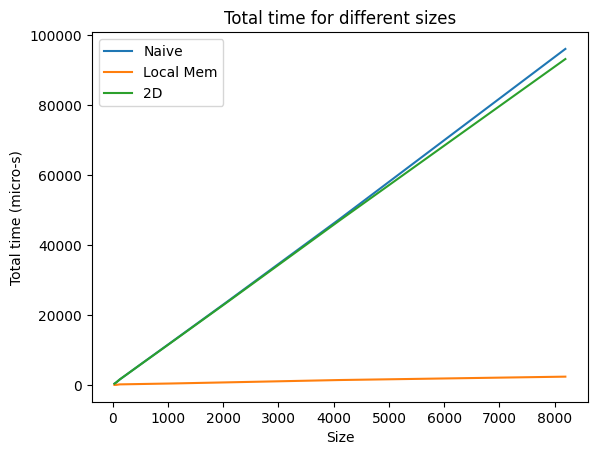

In [88]:
naive_cl_avg = naive_cl_filtered.groupby("size").mean()
local_mem_avg = local_mem_cl_filtered.groupby("size").mean()
bidimensional_cl_avg = bidimensional_cl_filtered.groupby("size").mean()

fig, ax = plt.subplots()
ax.plot(naive_cl_avg.index, naive_cl_avg["execution time"], label="Naive")
ax.plot(local_mem_avg.index, local_mem_avg["execution time"], label="Local Mem")
ax.plot(bidimensional_cl_avg.index, bidimensional_cl_avg["execution time"], label="2D")
ax.set_xlabel("Size")
ax.set_ylabel("Total time (micro-s)")
ax.legend()
plt.title("Total time for different sizes")
plt.show()

Este gráfico es similar al anterior, solo muestra tiempos promedios de ejecución por cada versión de la implementación entre todos los test realizados.

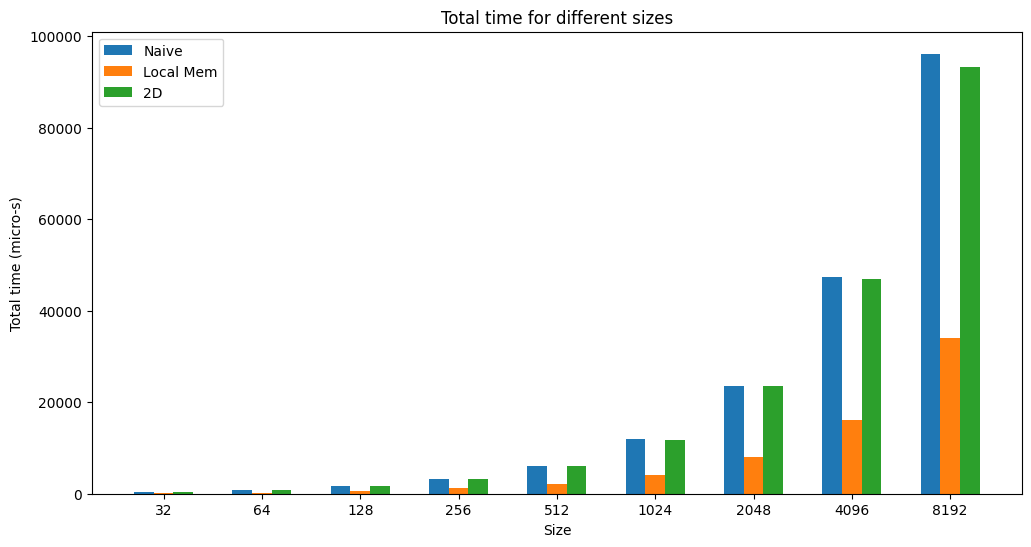

In [78]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Ancho de las barras

# Posiciones de las barras en el eje x
x = np.arange(len(naive_cl_avg.index))

# Dibujar las barras
ax.bar(x - width, naive_cl_avg["execution time"], width, label="Naive")
ax.bar(x, local_mem_avg["execution time"], width, label="Local Mem")
ax.bar(x + width, bidimensional_cl_avg["execution time"], width, label="2D")

# Ajustar las etiquetas y el formato del eje x
ax.set_xlabel("Size")
ax.set_ylabel("Total time (micro-s)")
ax.set_xticks(x)
ax.set_xticklabels(naive_cl_avg.index)
ax.legend()
plt.title("Total time for different sizes")
plt.show()

# Análisis solo NAIVE

Esta versión de la implementación es la inicial, la que realiza los n**2 cálculos accediendo a memoria global, habiendo mapeado los threads en una grilla unidimensional.

In [56]:
naive_local_grouped_data = naive_cl_filtered.groupby(['size', 'local size'])['execution time'].mean().unstack()
naive_global_grouped_data = naive_cl_filtered.groupby(['size', 'global size'])['execution time'].mean().unstack()

#### Gráfico de Barra para "local size"

Se mostrará en un gráfico de barras la variación en el desempeño de la implementación para los distintos valores de "local size" (threads por grupo) testeados.

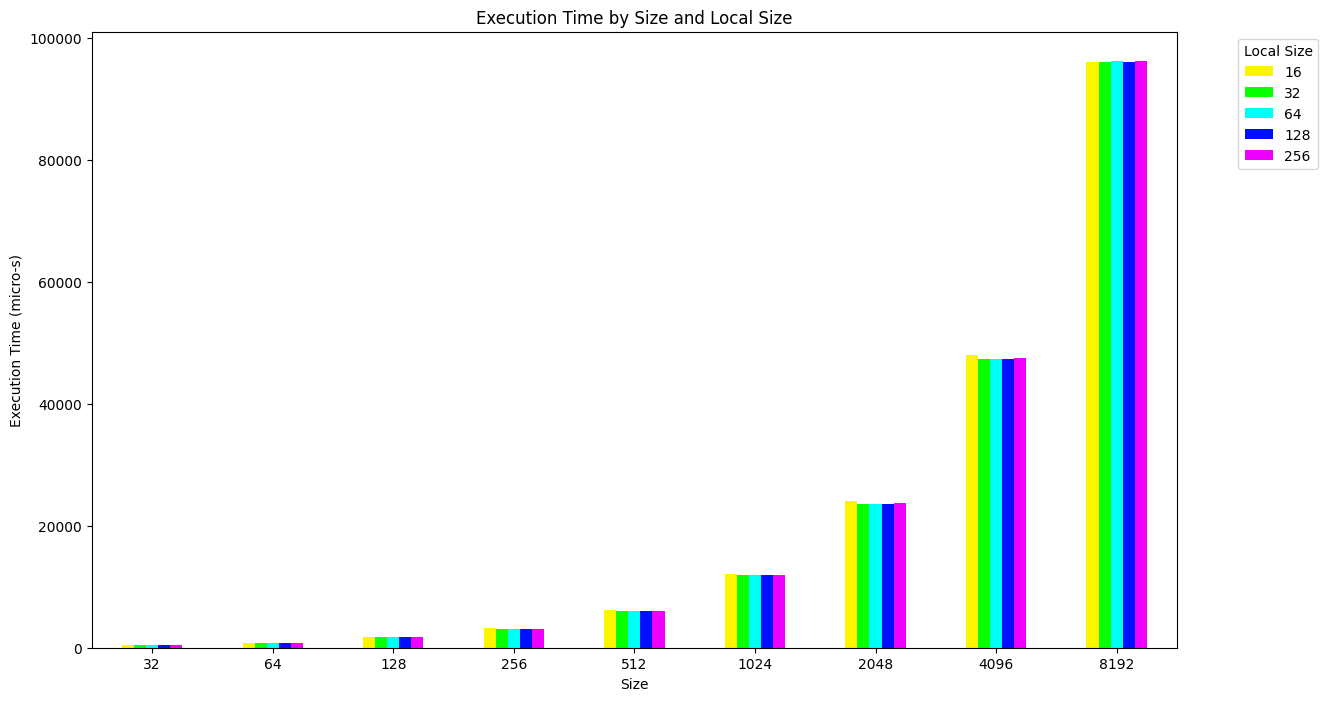

In [57]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

# Configurar colores para cada local size
colors = sns.color_palette("hsv", len(naive_local_grouped_data.columns))

# Plotear cada local size como una barra separada
naive_local_grouped_data.plot(kind='bar', ax=ax, color=colors)

# Configuraciones adicionales del gráfico
ax.set_xlabel("Size")
ax.set_ylabel("Execution Time (micro-s)")
ax.set_title("Execution Time by Size and Local Size")
ax.legend(title="Local Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

No se ve una tendencia para ningún valor de local size en particular, manteniendo valores cercanos para todas sus variaciones.

#### Gráfico de barra para "global size"

Se repetirá la visualización anterior para el global size, intentando observar algún patrón.

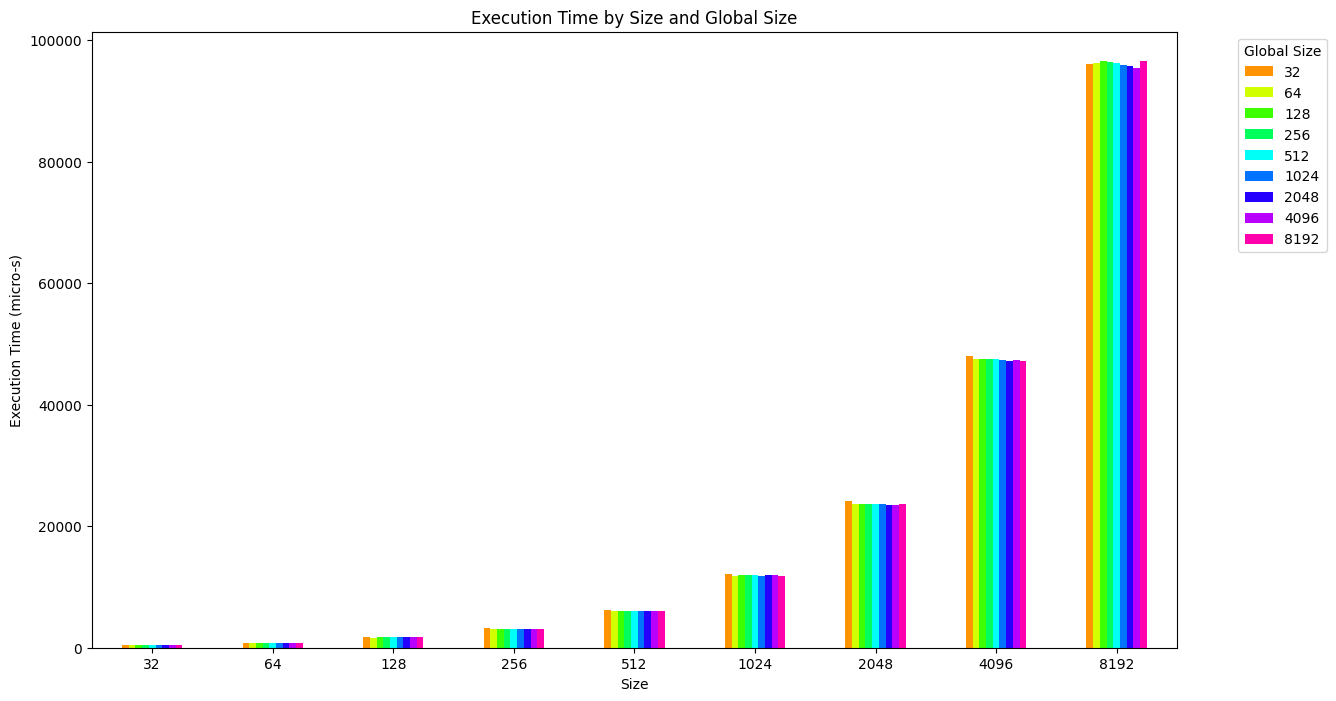

In [58]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

# Configurar colores para cada local size
colors = sns.color_palette("hsv", len(naive_global_grouped_data.columns))

# Plotear cada local size como una barra separada
naive_global_grouped_data.plot(kind='bar', ax=ax, color=colors)

# Configuraciones adicionales del gráfico
ax.set_xlabel("Size")
ax.set_ylabel("Execution Time (micro-s)")
ax.set_title("Execution Time by Size and Global Size")
ax.legend(title="Global Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

Nuevamente se ven tiempos de ejecución similares para todos los valores de cantidad total del work space por lo que no hay diferenciación.

#### Análisis de Pares ("local size", "global size")

Se decidió experimentar con pares (local size, global size), en caso de que el mapeo tuviera mejor desempeño. Para esto se desarrollaron mapas de calor para cada valor de size (cantidad de cuerpos) en el que el eje "x representa el global size y el "y" representa el local size y cada zona es el tiempo de ejecución promedio para esa combinación de datos.

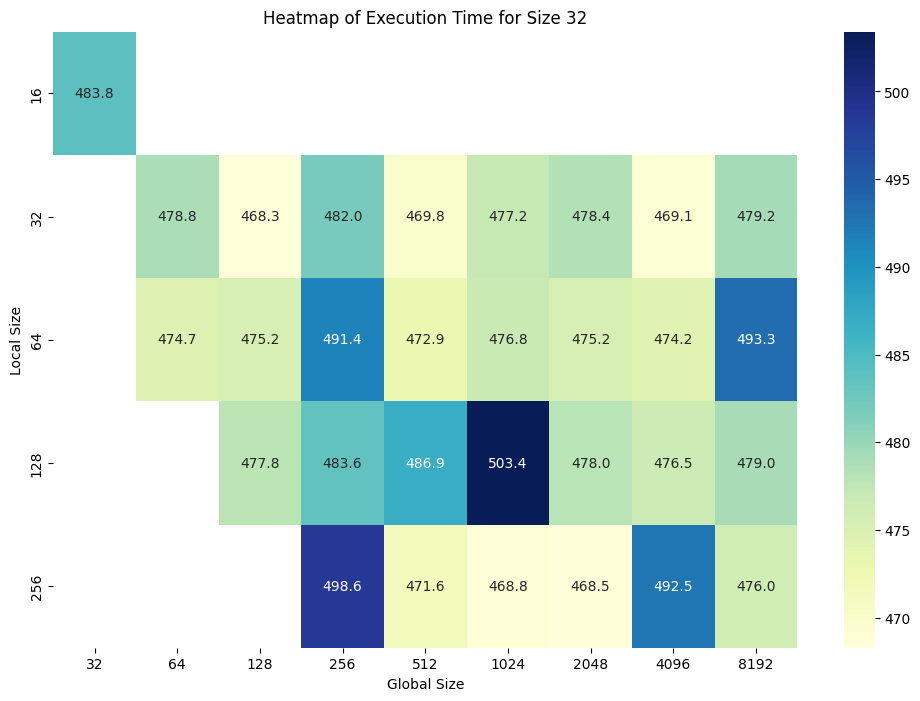

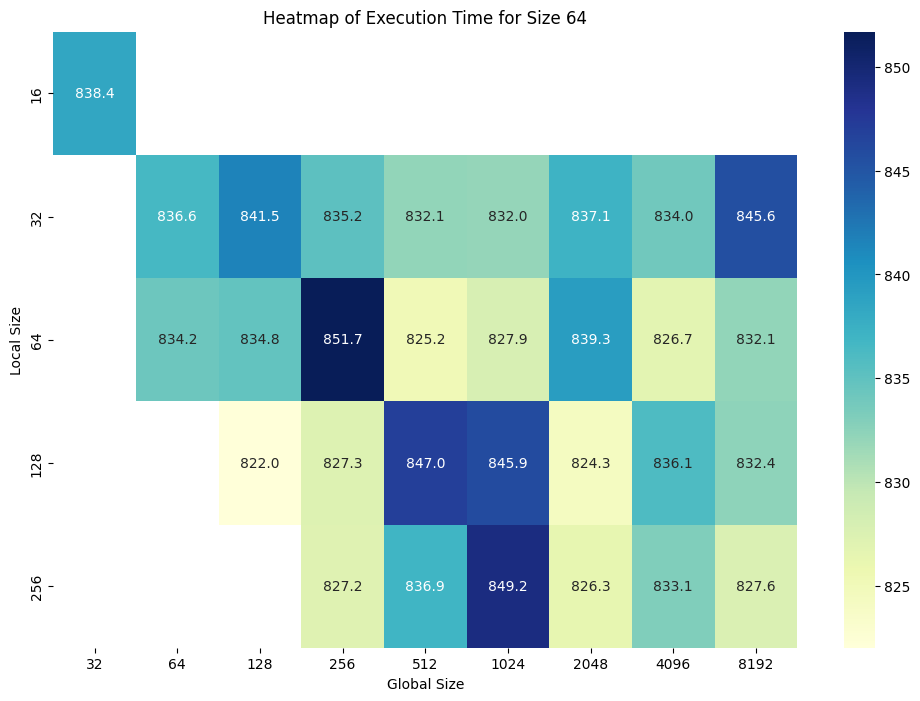

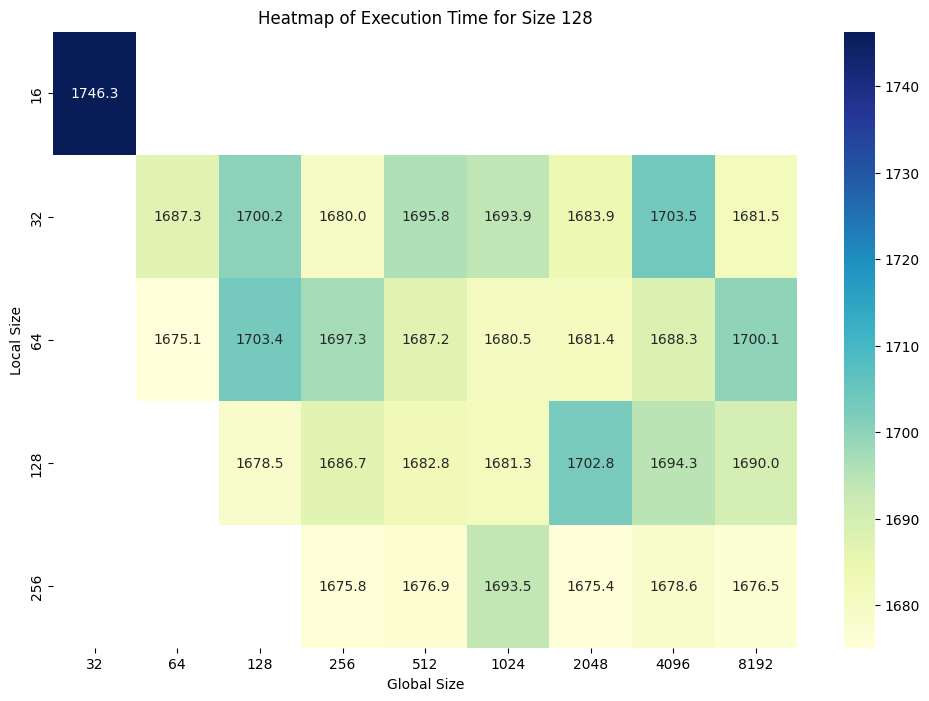

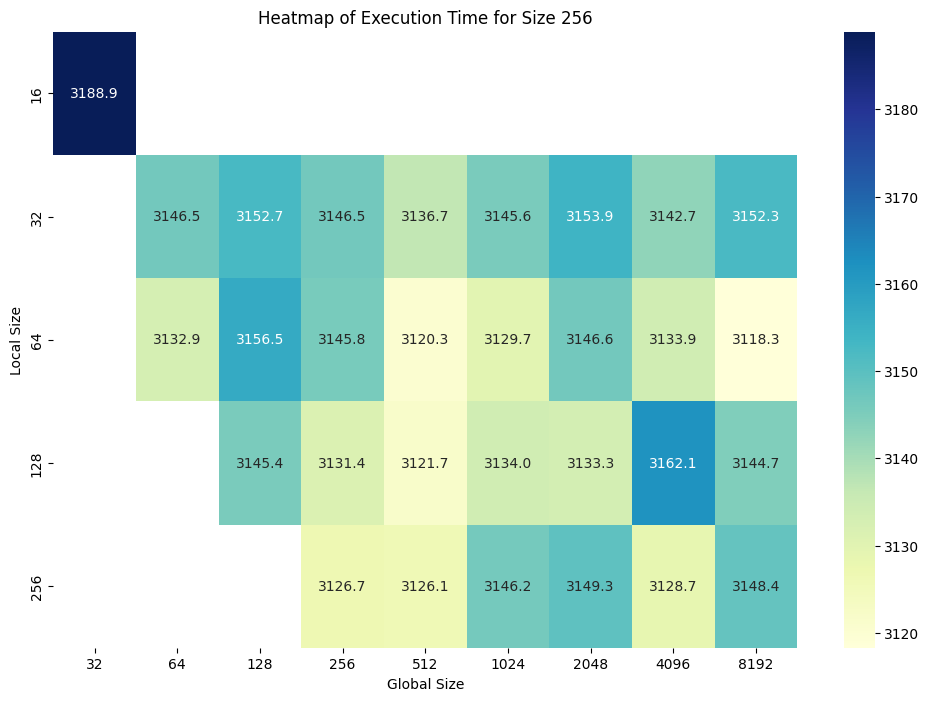

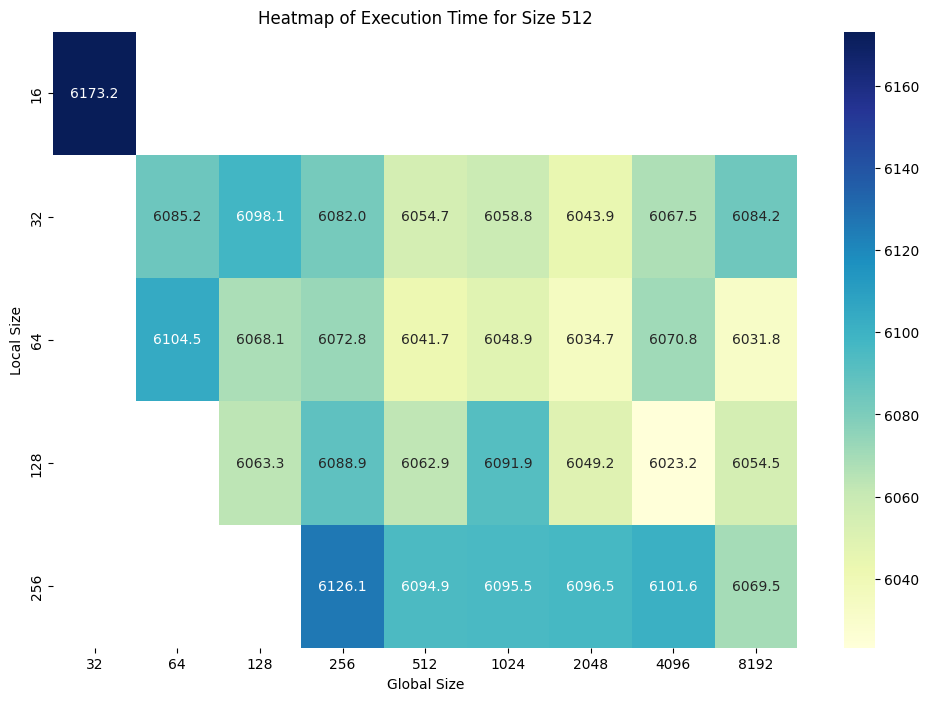

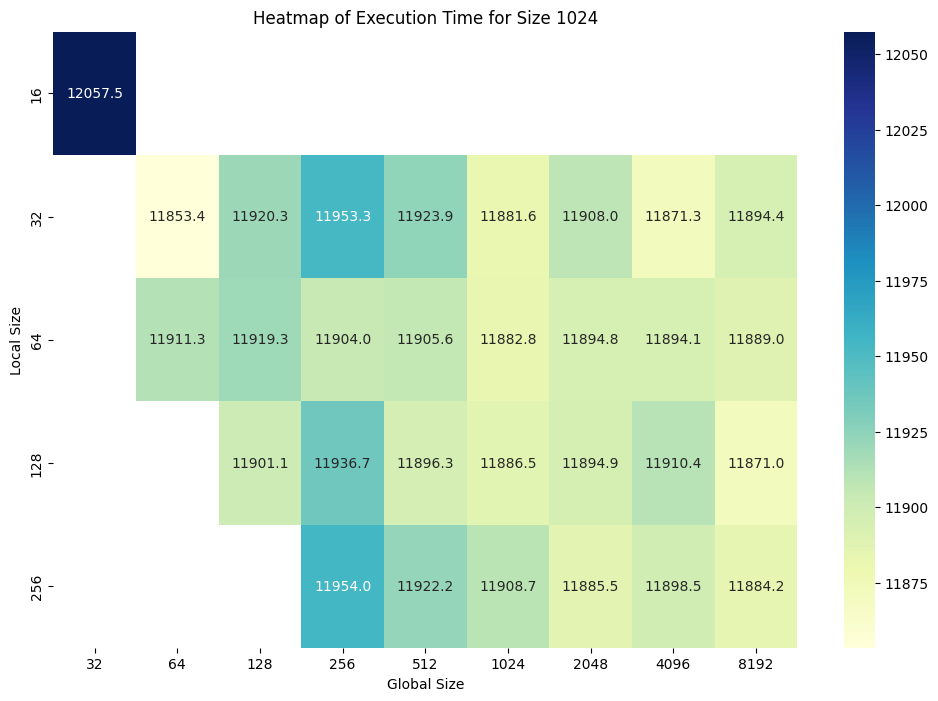

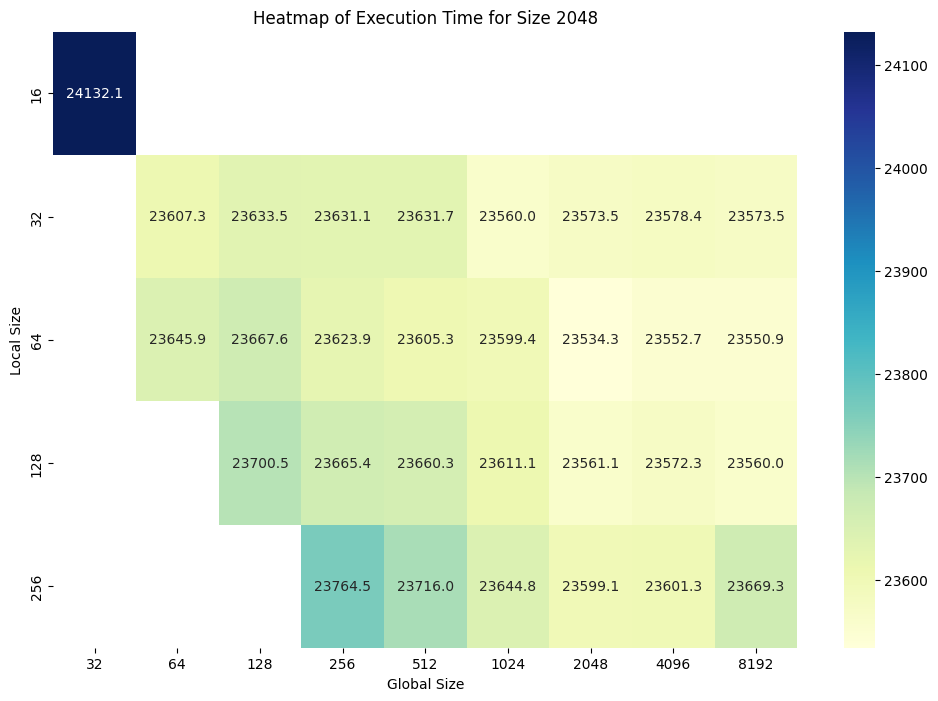

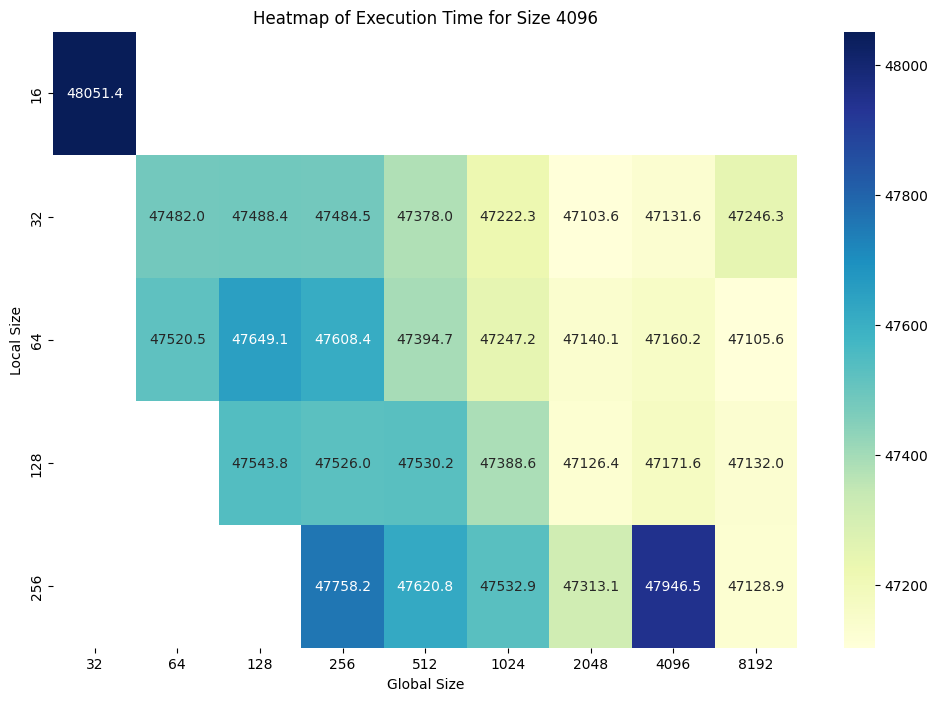

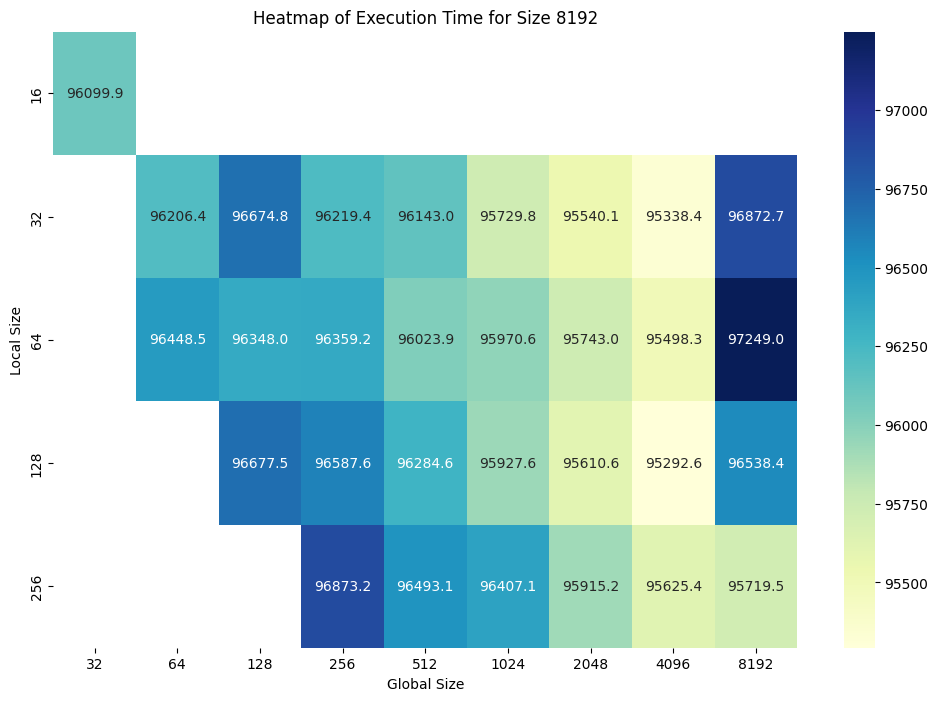

In [60]:
# Crear una tabla pivot para promediar los tiempos de ejecución según "local size" y "global size"
naive_unique_sizes = naive_cl_filtered['size'].unique()

# Crear heatmaps para cada valor de 'size'
for size in naive_unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = naive_cl_filtered[naive_cl_filtered['size'] == size]
    
    # Crear una tabla pivot para promediar los tiempos de ejecución según "local size" y "global size"
    pivot_table = size_data.pivot_table(values='execution time', index='local size', columns='global size', aggfunc='mean')
    
    # Crear el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title(f'Heatmap of Execution Time (micro-s) for Size {size}')
    plt.xlabel('Global Size')
    plt.ylabel('Local Size')
    plt.show()

En este caso sí se ven mejores respuestas para valores de local size igual a 128, con un global size variable (entre 1024, 2048 y 4096 se ven los mejores resultados en general).

#### Análisis combinado de pares ("local size", "global size")

Se repetirá lo anterior con un gráfico de dispersión, esperando que se visualice de mejor manera algún comportamiento.

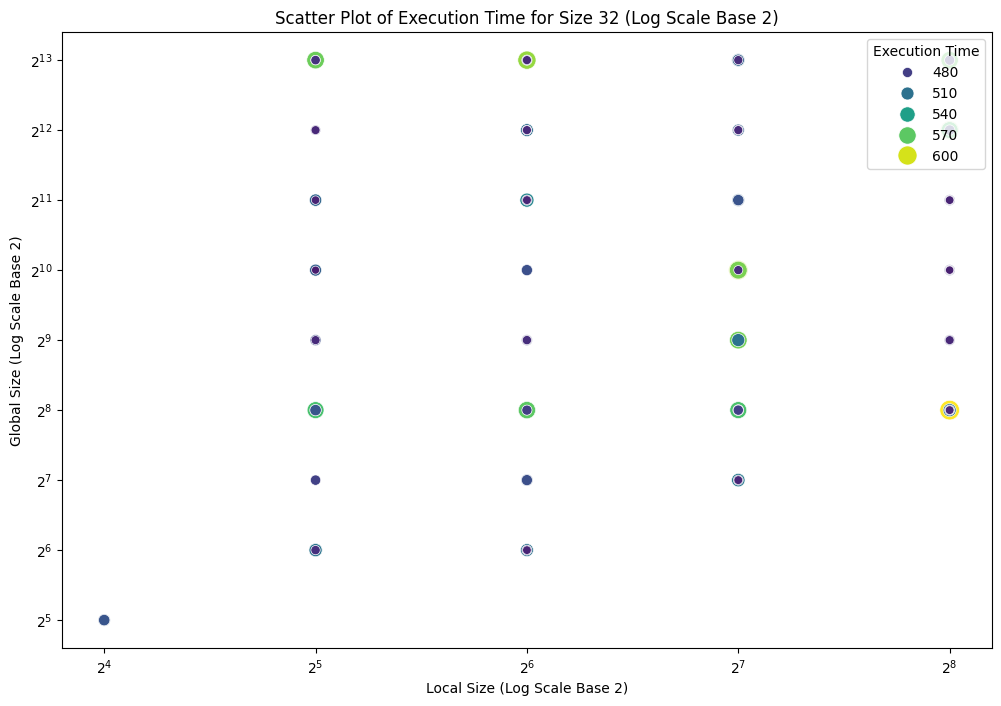

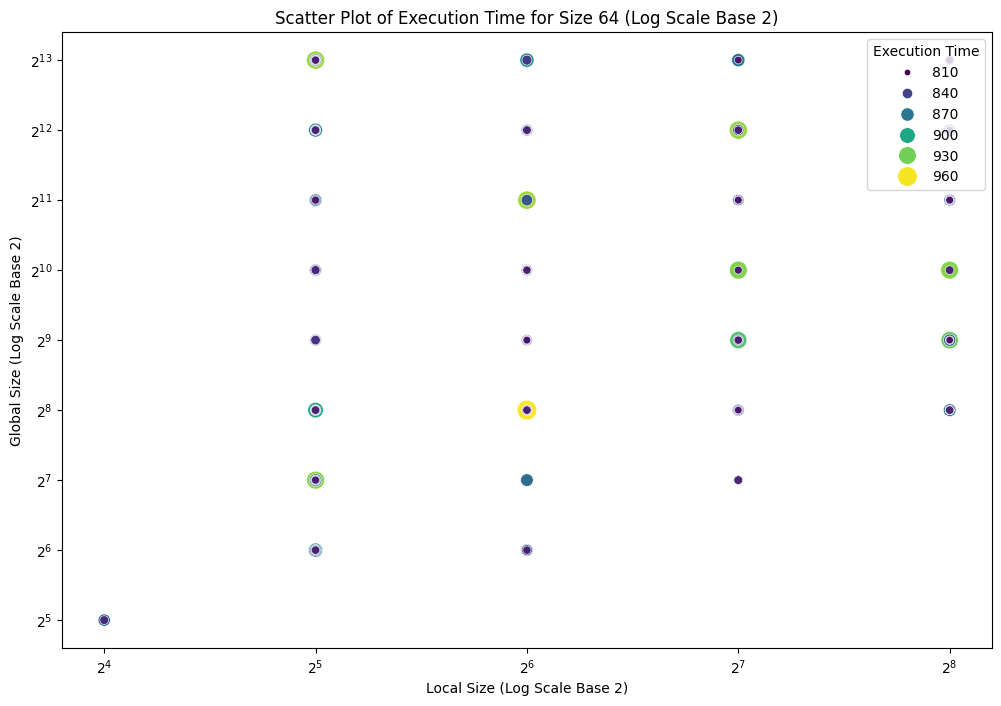

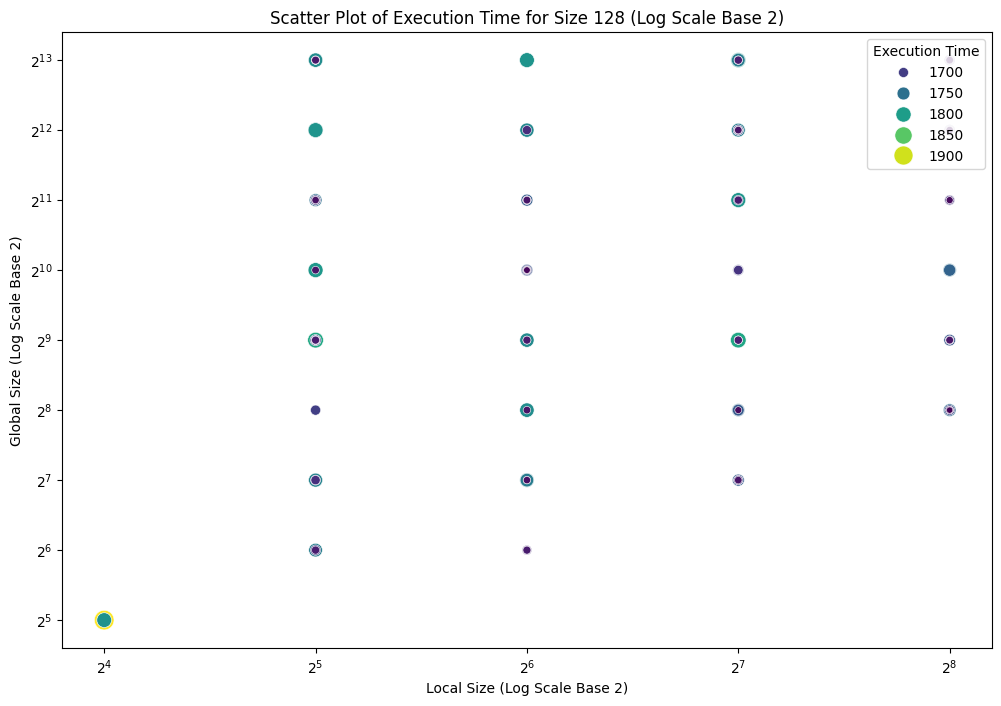

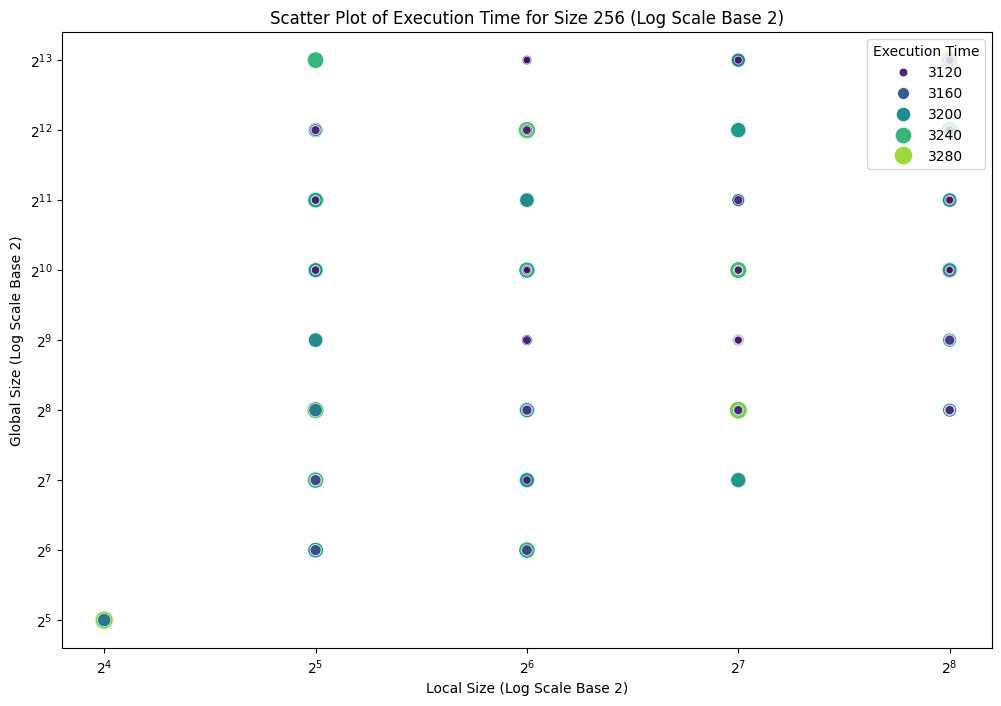

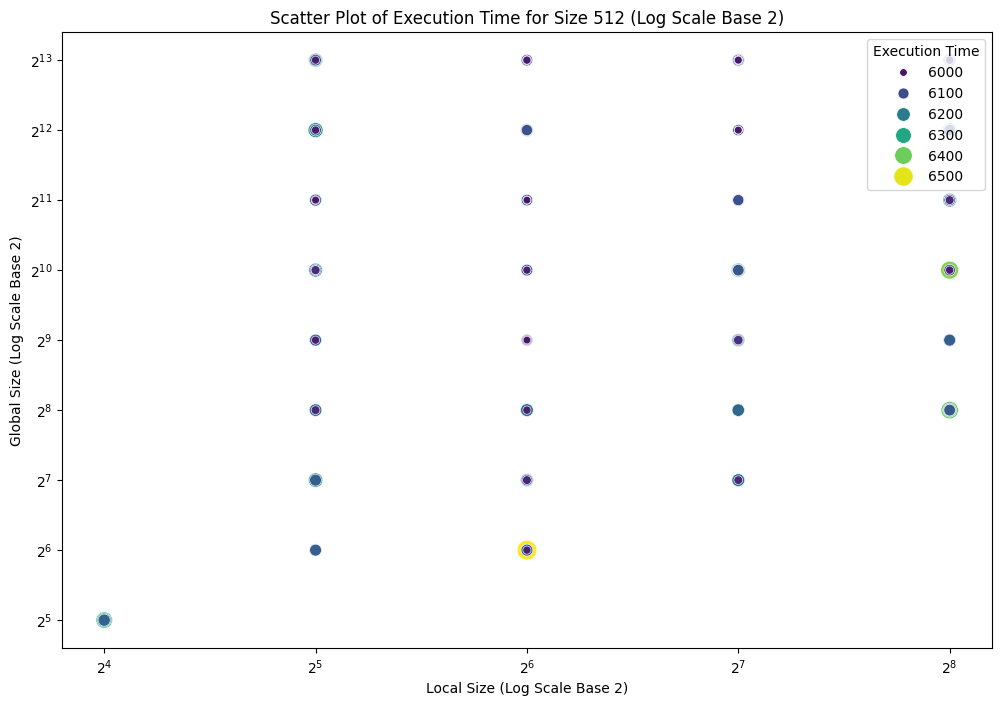

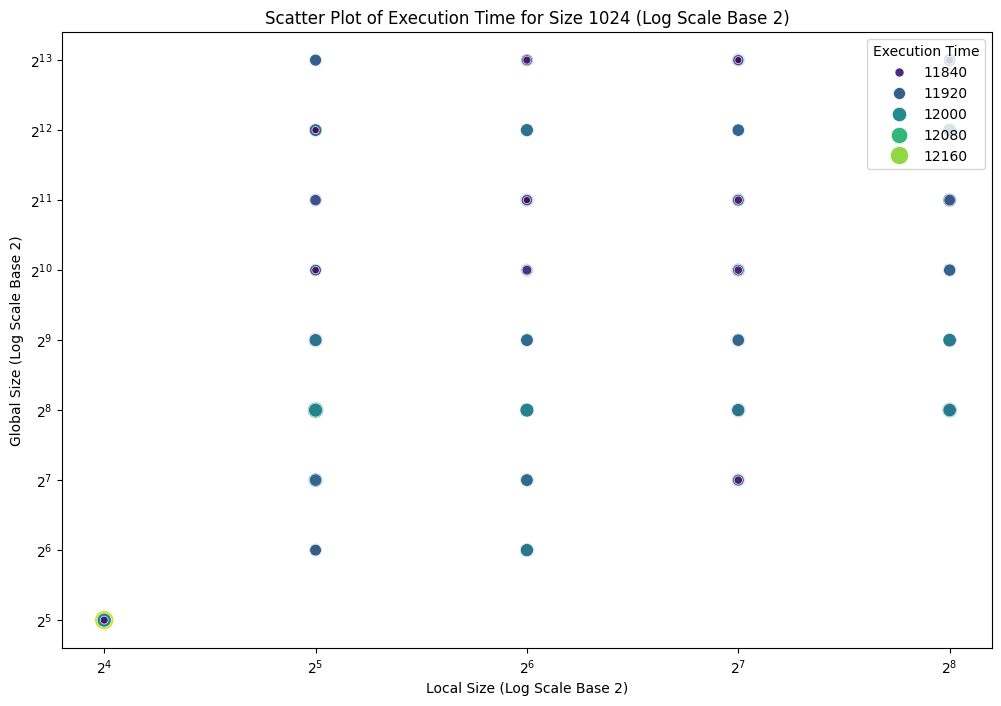

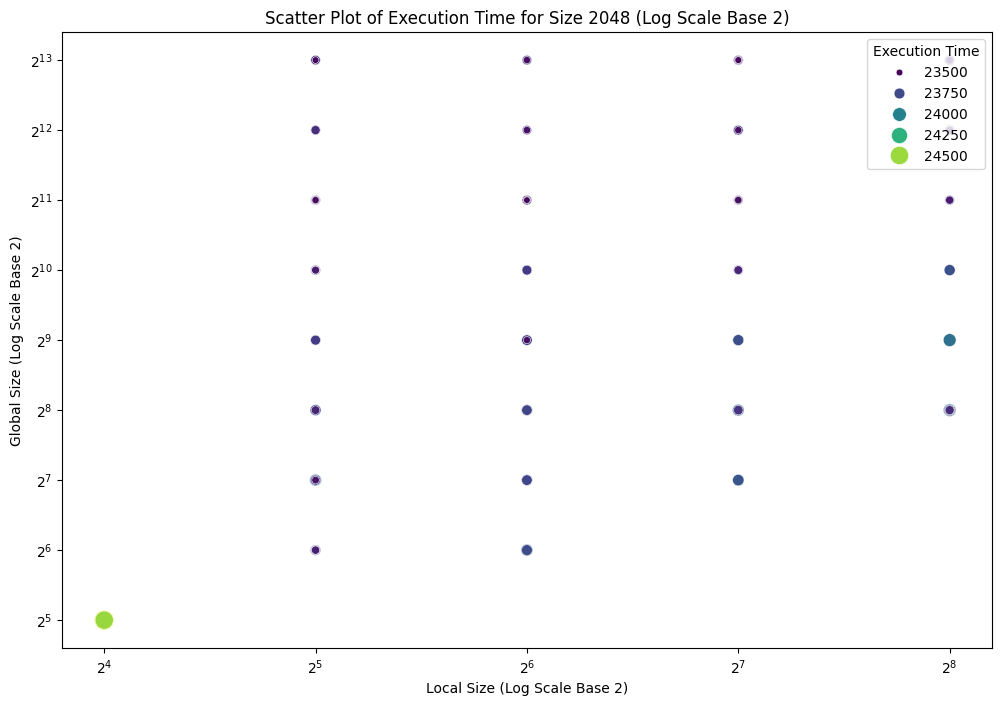

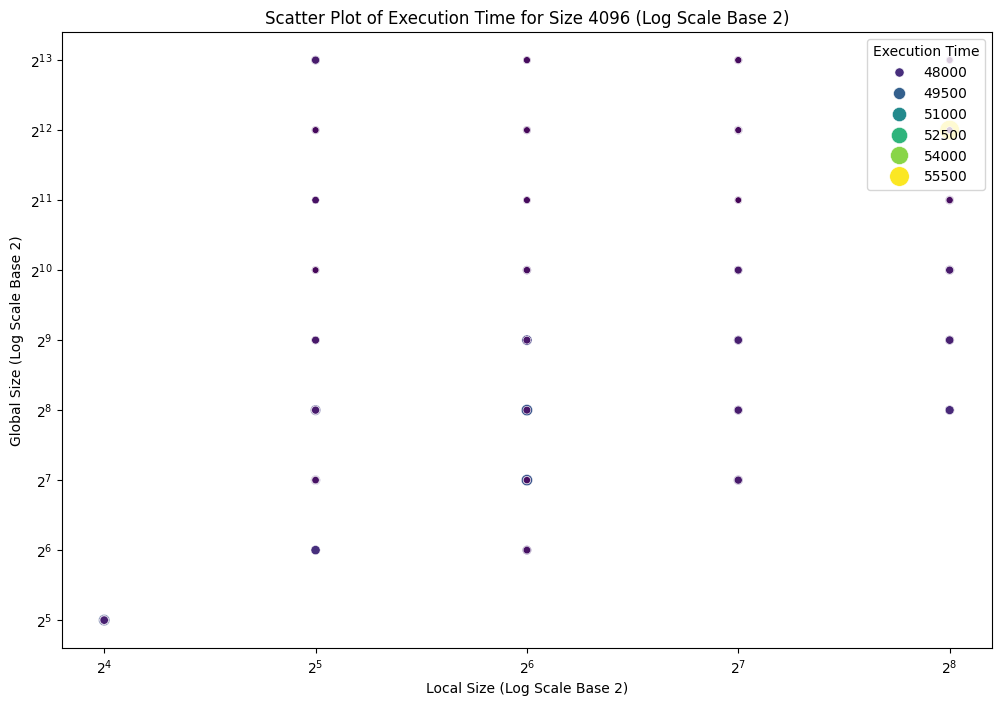

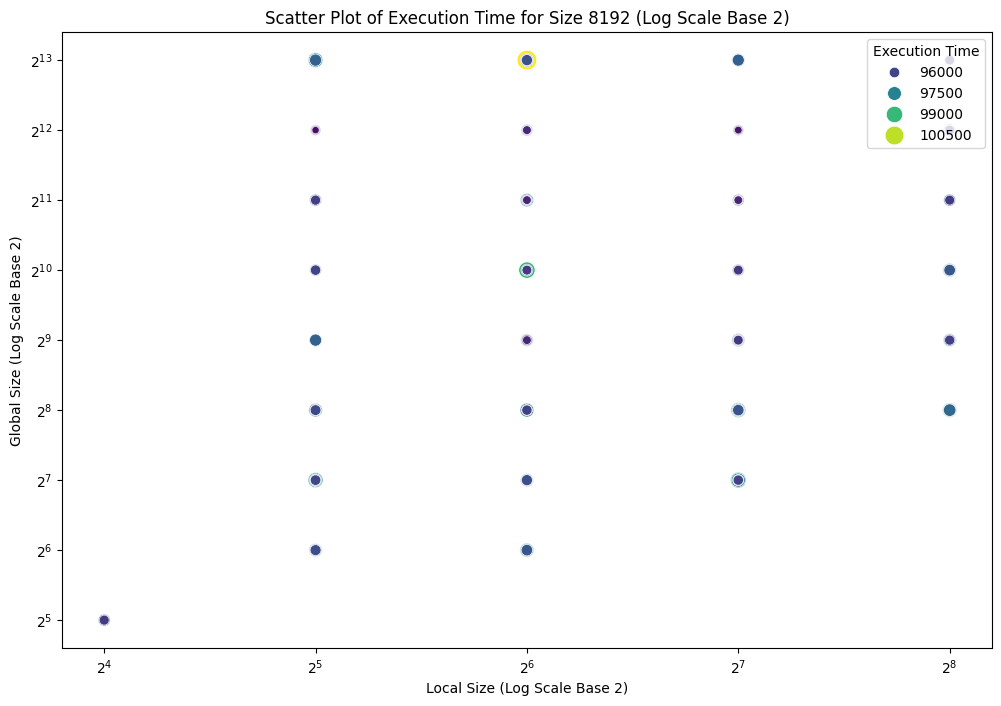

In [64]:
for size in naive_unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = naive_cl_filtered[naive_cl_filtered['size'] == size]
    
    # Crear el scatter plot
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        x='local size', 
        y='global size', 
        hue='execution time', 
        size='execution time', 
        sizes=(20, 200), 
        data=size_data, 
        palette='viridis'
    )
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    plt.title(f'Scatter Plot of Execution Time (micro-s) for Size {size} (Log Scale Base 2)')
    plt.xlabel('Local Size (Log Scale Base 2)')
    plt.ylabel('Global Size (Log Scale Base 2)')
    plt.legend(loc='upper right', title='Execution Time')
    plt.show()

El estudio anterior no permitió dilucidar nada nuevo. 

# Análisis solo Memoria Compartida

Esta versión de la implementación es segunda realizada, la que realiza los n**2 cálculos accediendo a memoria global para mover chunks de datos a memoria compartida habiendo mapeado los threads en una grilla unidimensional. Así solo se accede una fracción de veces al arreglo global (dependiendo del tamaño de la memoria compartida y del tamaño del arreglo global).

#### Gráfico de barras para "local size"

Se mostrará en un gráfico de barras la variación en el desempeño de la implementación para los distintos valores de "local size" (threads por grupo) testeados.

In [89]:
local_mem_local_grouped_data = local_mem_cl_filtered.groupby(['size', 'local size'])['execution time'].mean().unstack()
local_mem_global_grouped_data = local_mem_cl_filtered.groupby(['size', 'global size'])['execution time'].mean().unstack()

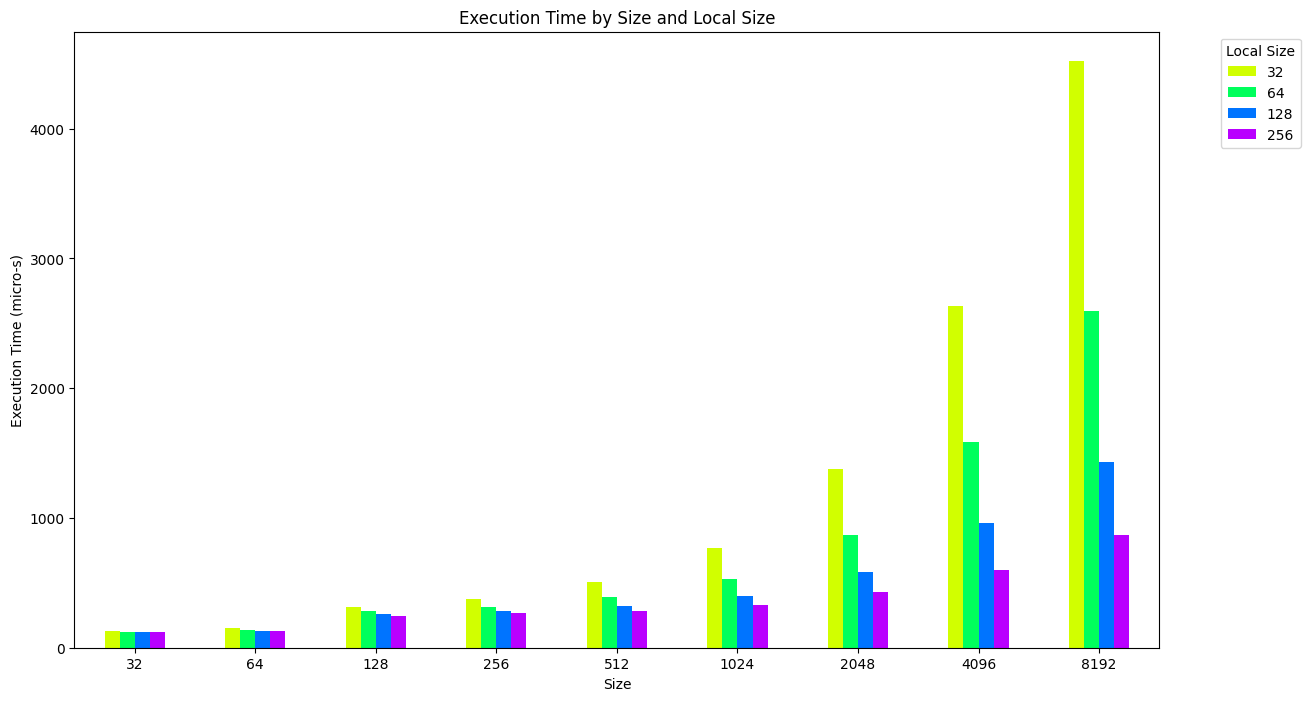

In [90]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

# Configurar colores para cada local size
colors = sns.color_palette("hsv", len(local_mem_local_grouped_data.columns))

# Plotear cada local size como una barra separada
local_mem_local_grouped_data.plot(kind='bar', ax=ax, color=colors)

# Configuraciones adicionales del gráfico
ax.set_xlabel("Size")
ax.set_ylabel("Execution Time (micro-s)")
ax.set_title("Execution Time by Size and Local Size")
ax.legend(title="Local Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

Se puede ver una leve variación en la cual hay un mejor desempeño para local size igual a 128.

#### Gráfico de barras para "global size"

Se mostrará en un gráfico de barras la variación en el desempeño de la implementación para los distintos valores de "global size" (threads en total) testeados similar a lo anterior.

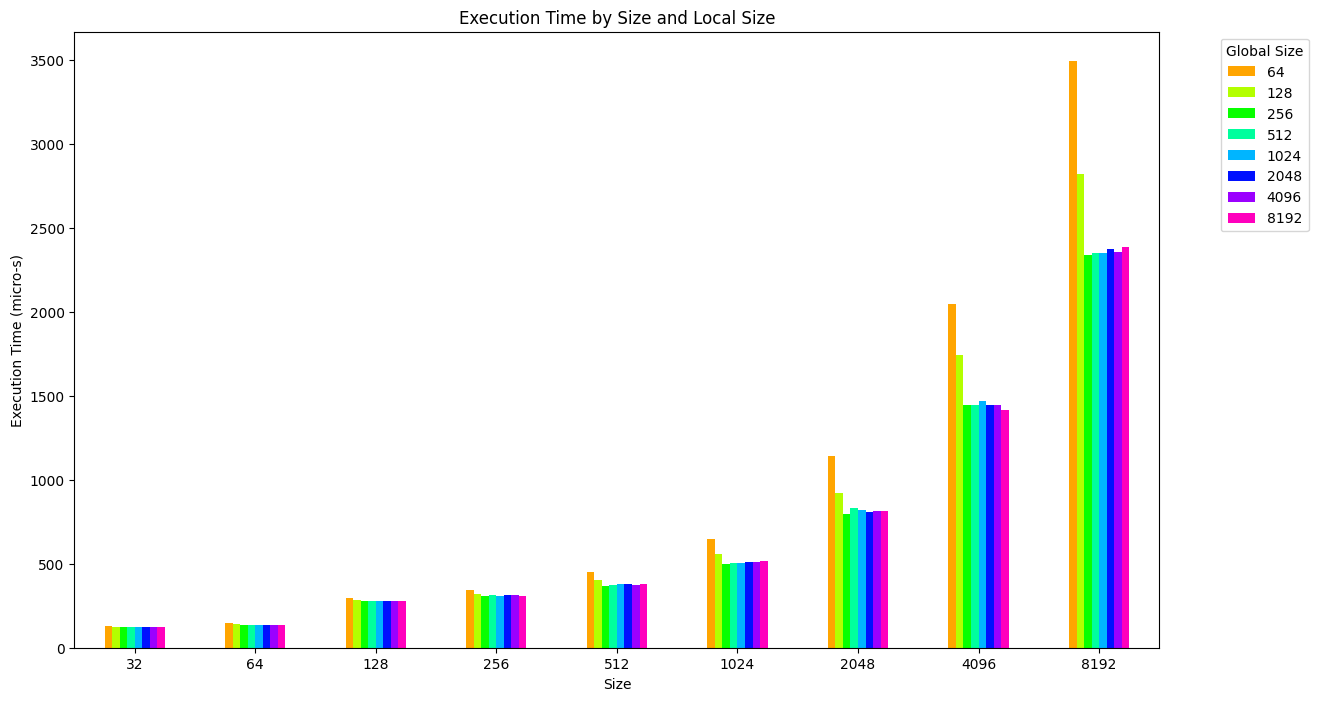

In [91]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))

# Configurar colores para cada local size
colors = sns.color_palette("hsv", len(local_mem_global_grouped_data.columns))

# Plotear cada local size como una barra separada
local_mem_global_grouped_data.plot(kind='bar', ax=ax, color=colors)

# Configuraciones adicionales del gráfico
ax.set_xlabel("Size")
ax.set_ylabel("Execution Time (micro-s)")
ax.set_title("Execution Time by Size and Local Size")
ax.legend(title="Global Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.show()

No hay un patrón de mejor desempeño, pero se ve que a mayor size un mayor tamaño de global size es peor.

#### Análisis de Pares ("local size", "global size")

Se estudian las combinaciones de pares ("local size", "global size"), al igual que para la versión anterior, para verificar la existencia (o ausencia) de un valor de mejor rendimiento.

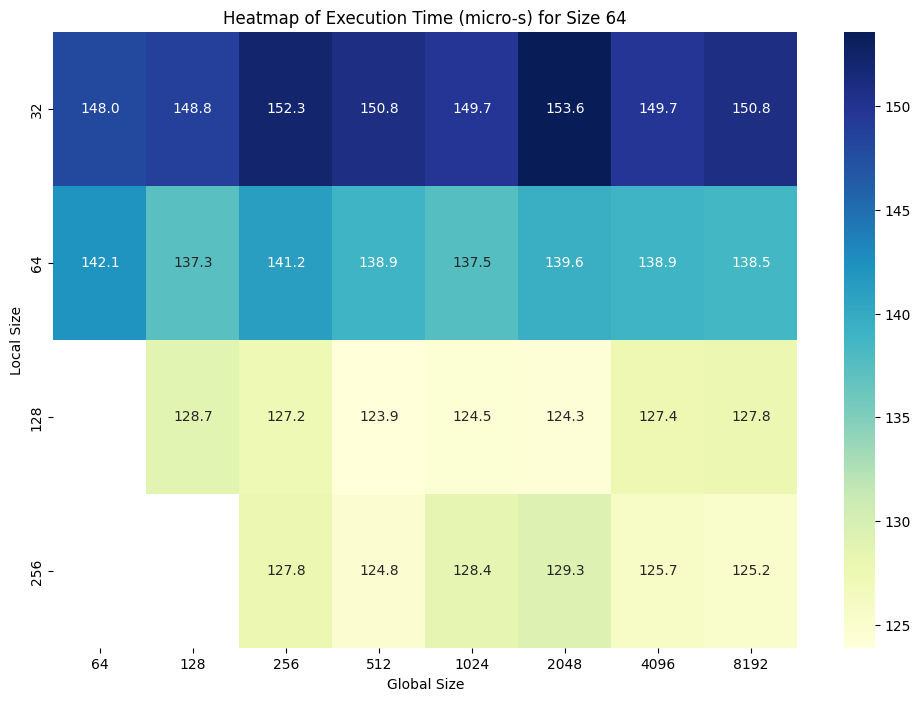

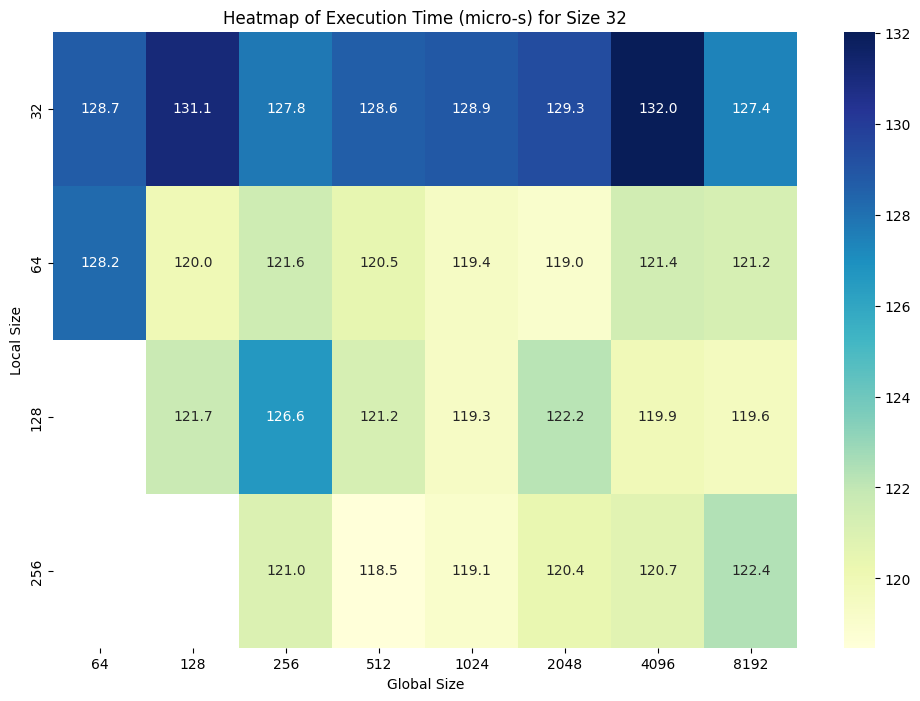

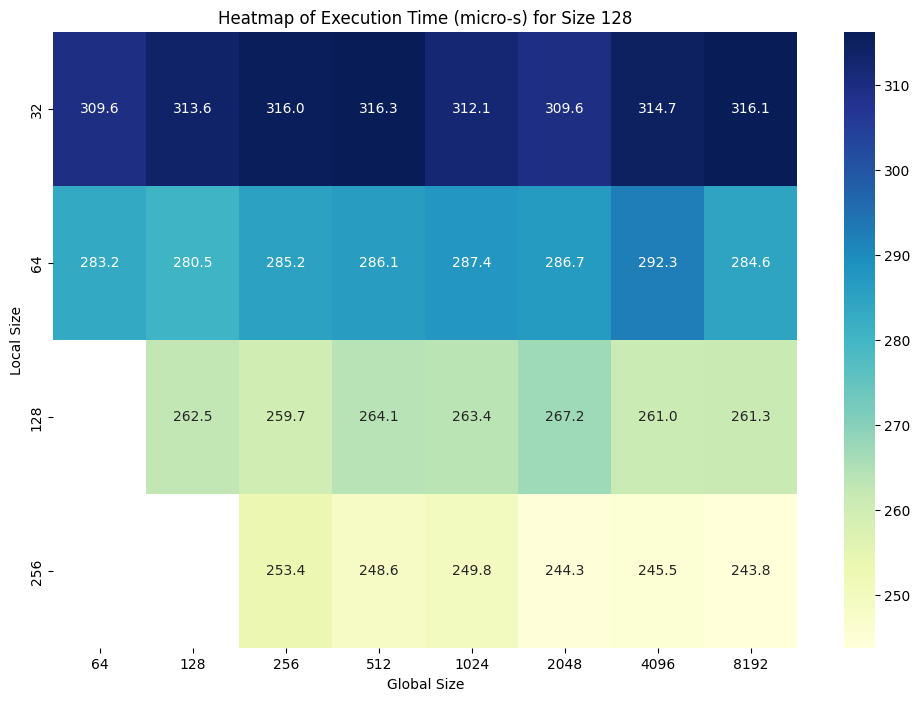

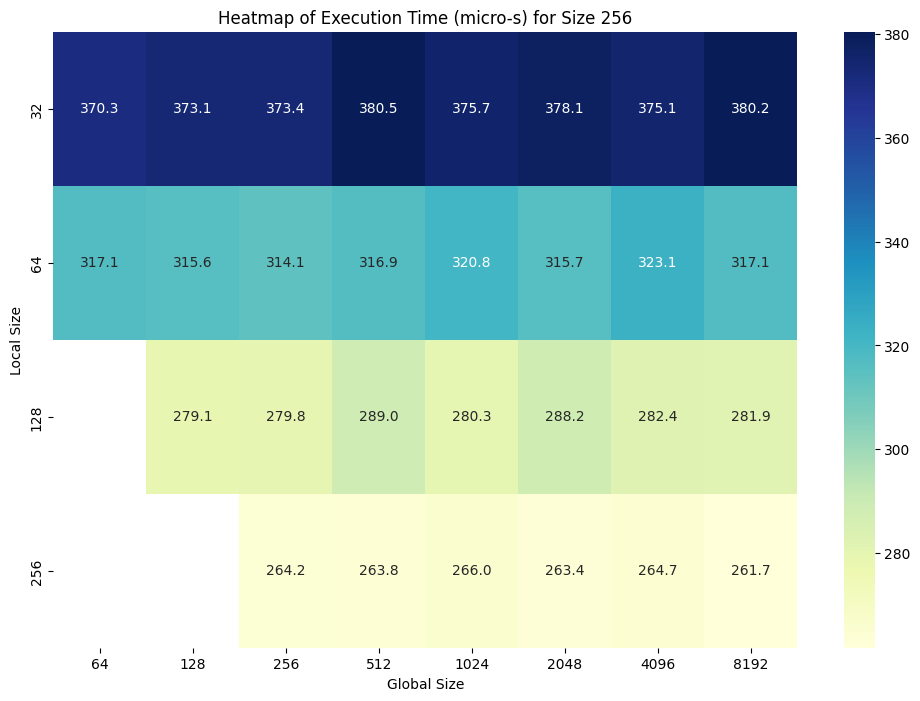

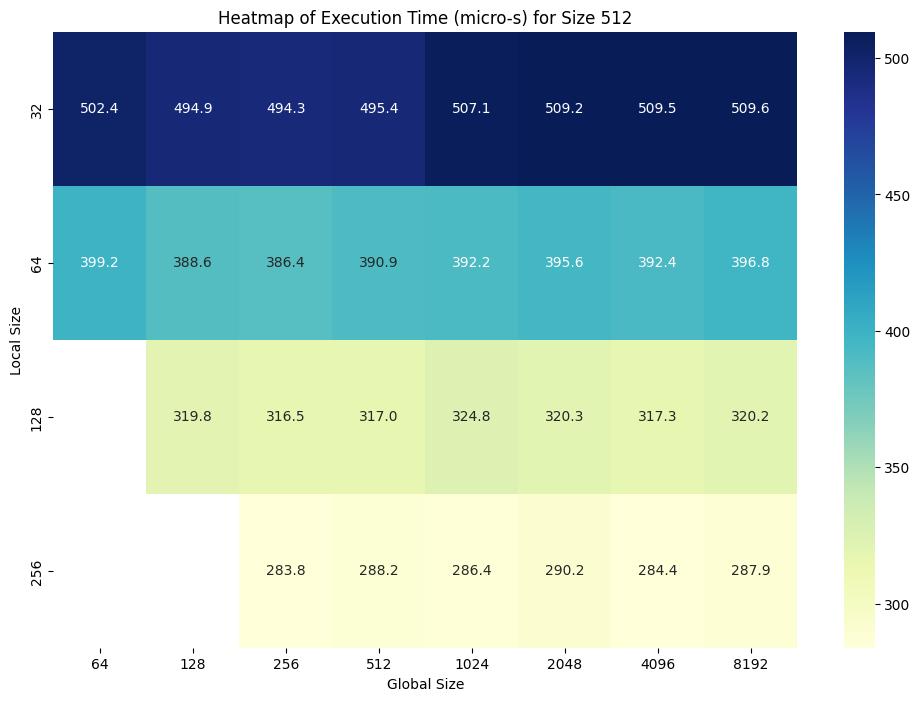

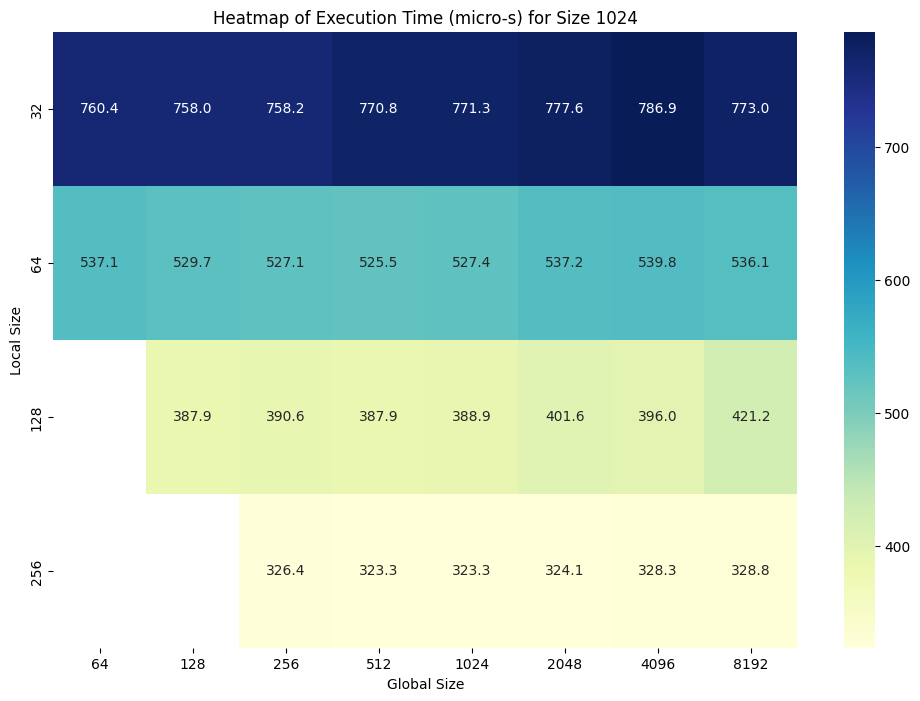

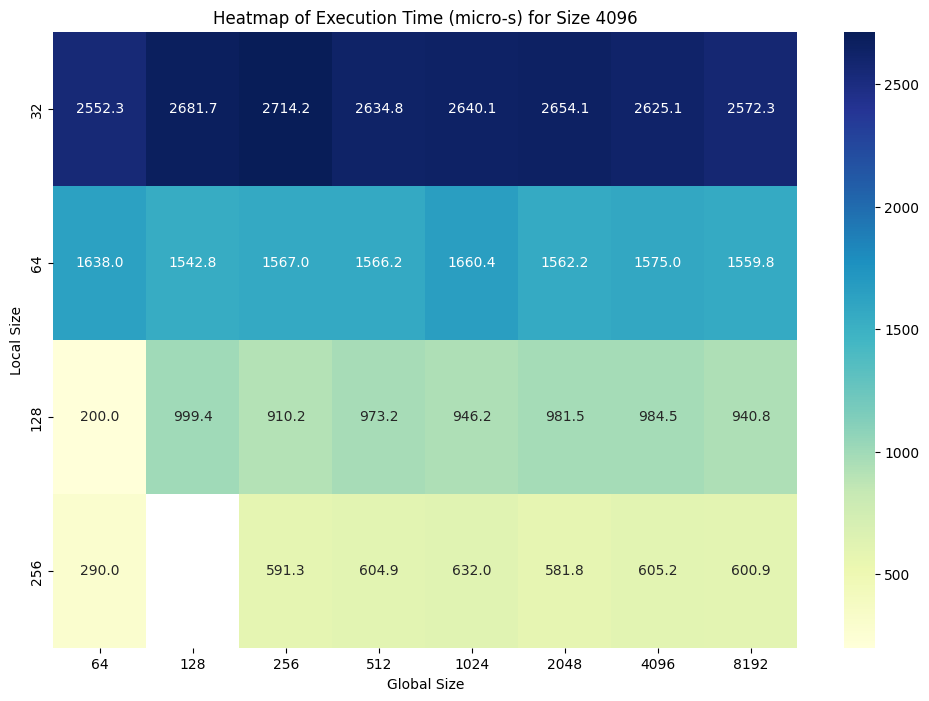

In [92]:
# Crear una tabla pivot para promediar los tiempos de ejecución según "local size" y "global size"
unique_sizes = local_mem_cl_filtered['size'].unique()

# Crear heatmaps para cada valor de 'size'
for size in unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = local_mem_cl_filtered[local_mem_cl_filtered['size'] == size]
    
    # Crear una tabla pivot para promediar los tiempos de ejecución según "local size" y "global size"
    pivot_table = size_data.pivot_table(values='execution time', index='local size', columns='global size', aggfunc='mean')
    
    # Crear el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title(f'Heatmap of Execution Time (micro-s) for Size {size}')
    plt.xlabel('Global Size')
    plt.ylabel('Local Size')
    plt.show()

Existe una especie de fallo (outliers) con el gráfico para size igual a 4096, por lo que no se consideran los valores para local size =128 y global size=64. Al igual que antes se observa un mejor desempeño para local size = 128 en general, y curiosamente para global size de menor tamaño (256, 512, 1024)..

#### Análisis combinado de pares ("local size", "global size")

Se repite la aparición de un gráfico de dispersión.

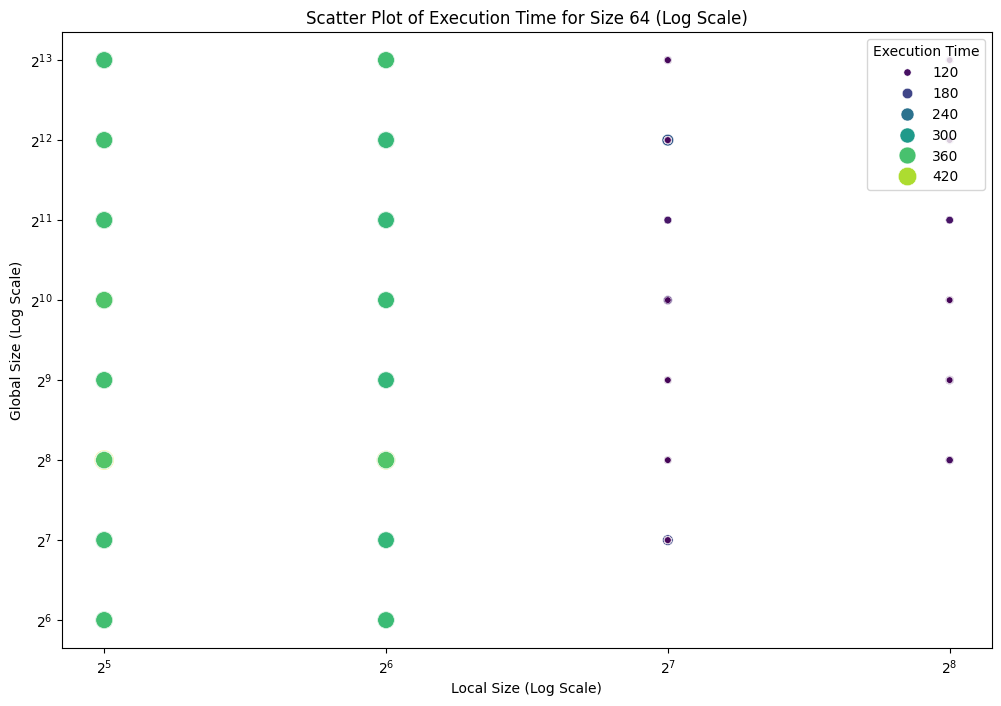

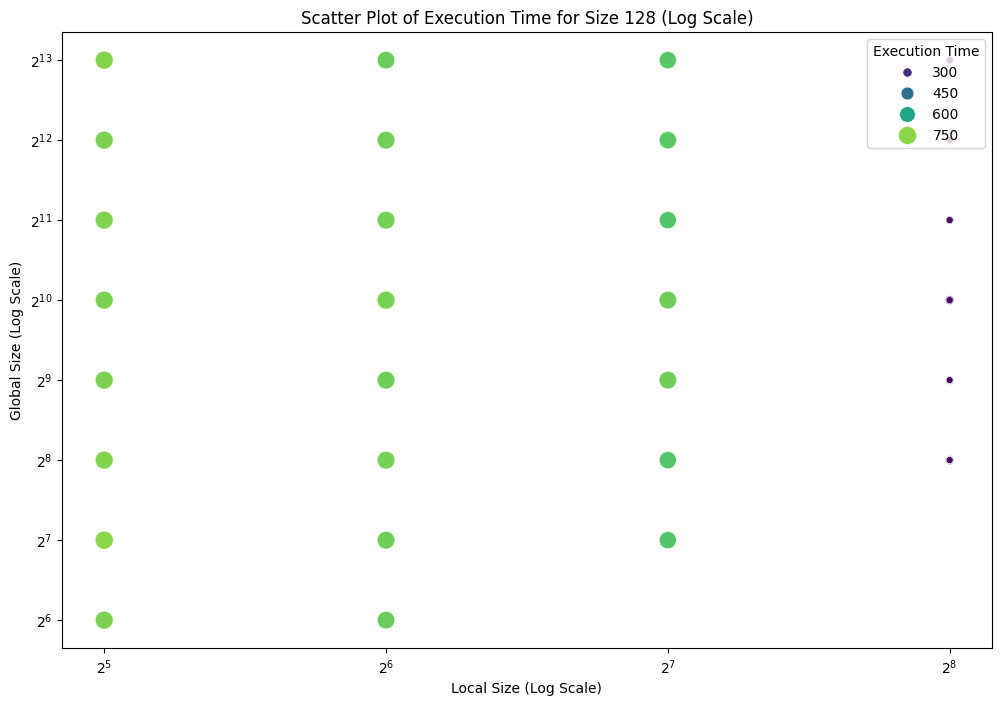

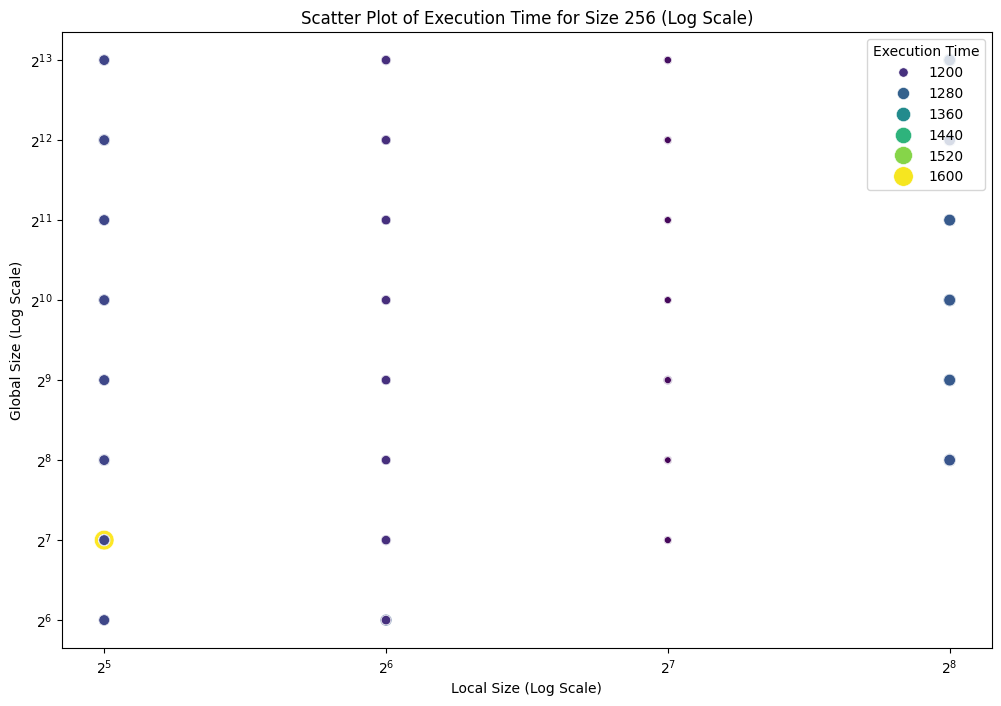

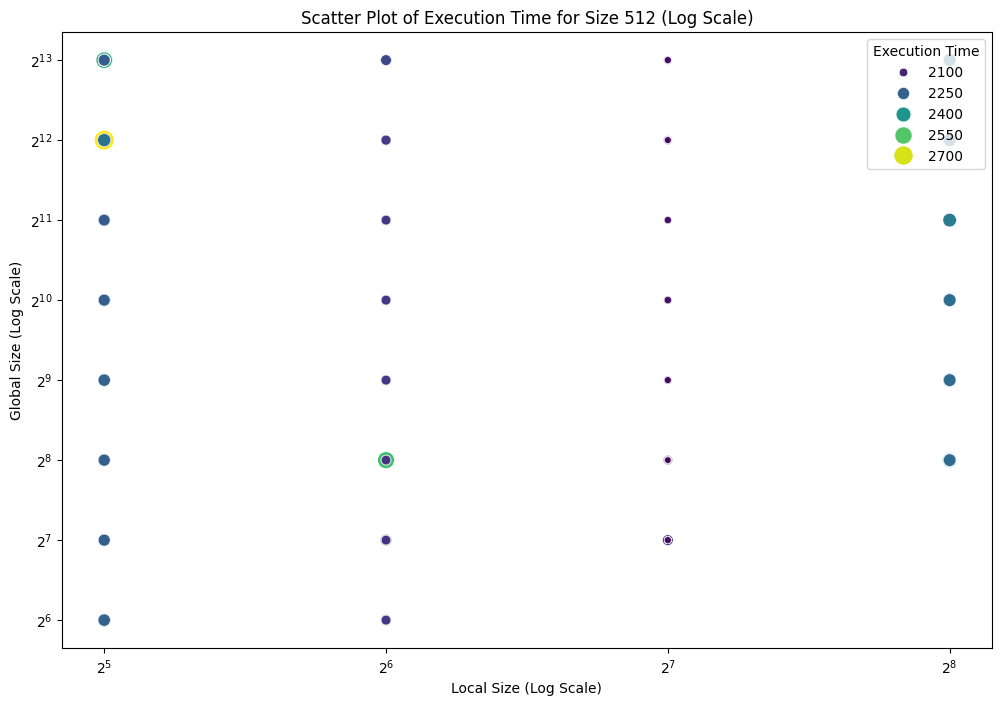

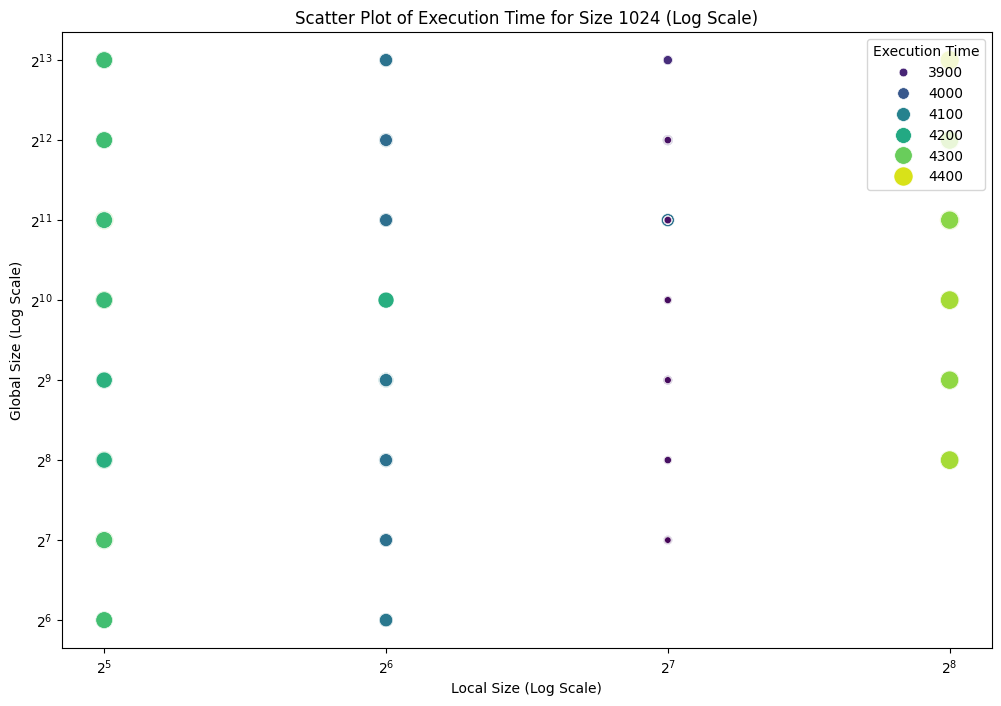

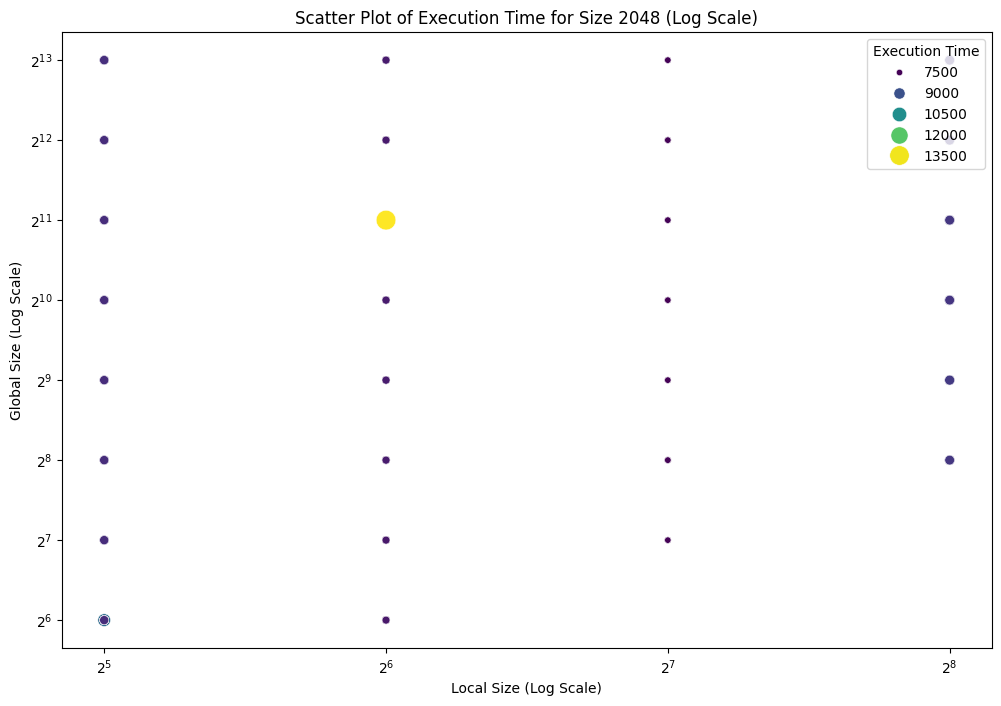

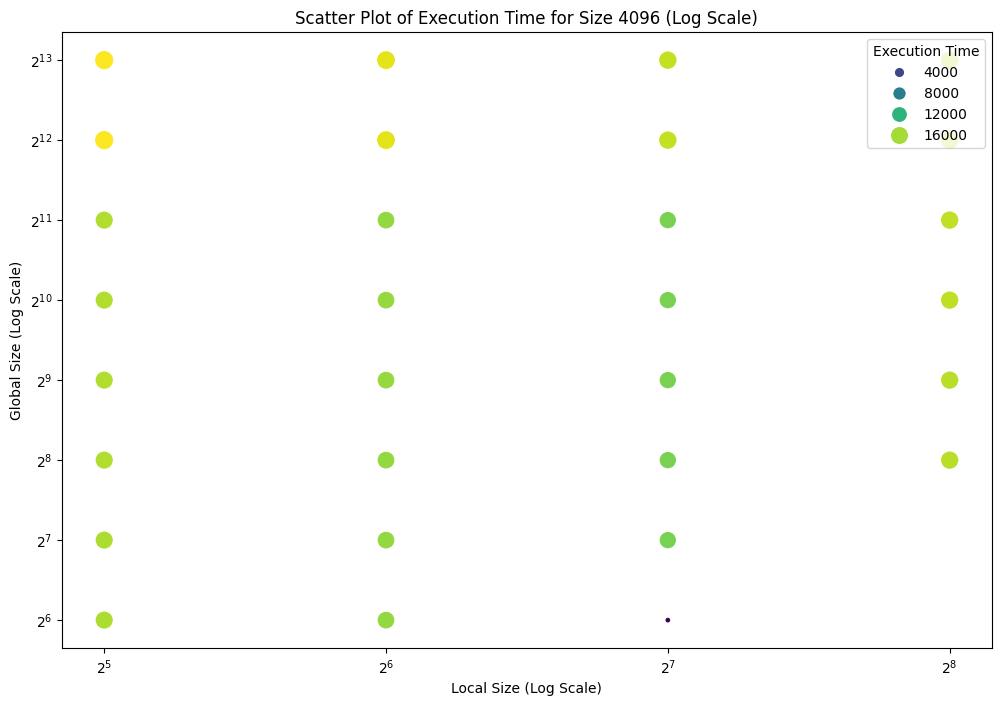

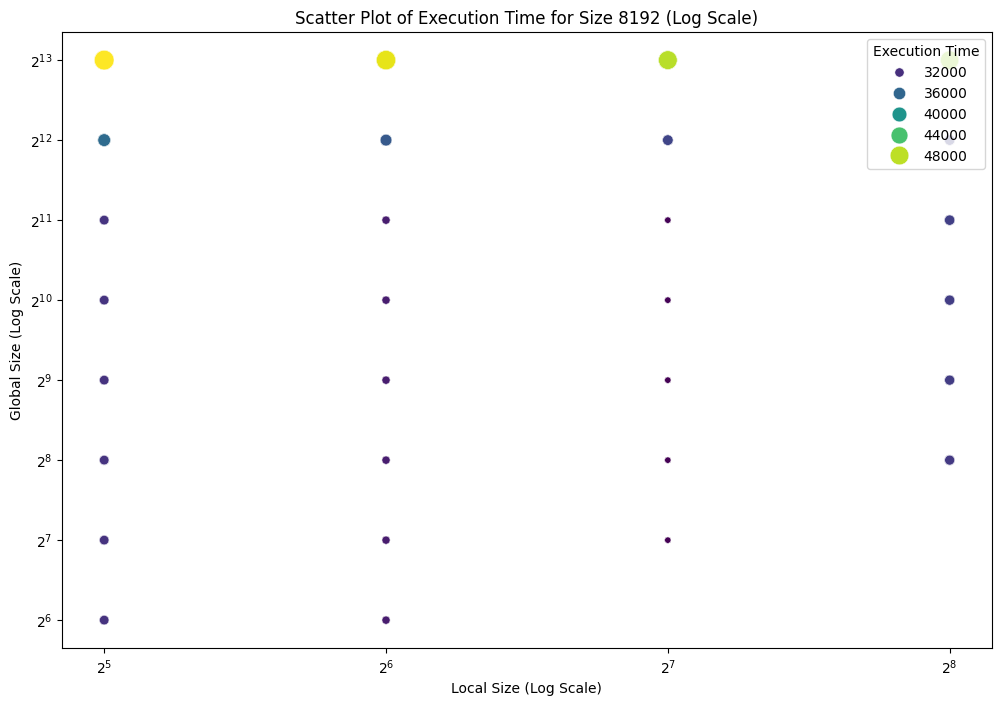

In [62]:
for size in unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = local_mem_cl_filtered[local_mem_cl_filtered['size'] == size]
    
    # Crear el scatter plot
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        x='local size', 
        y='global size', 
        hue='execution time', 
        size='execution time', 
        sizes=(20, 200), 
        data=size_data, 
        palette='viridis'
    )
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)
    plt.title(f'Scatter Plot of Execution Time (micro-s) for Size {size} (Log Scale)')
    plt.xlabel('Local Size (Log Scale)')
    plt.ylabel('Global Size (Log Scale)')
    plt.legend(loc='upper right', title='Execution Time')
    plt.show()

Mejor rendimiento para 2**7 (128) de local size.

#### Análisis local mem según mejores valores de "global size" y "local size"

Basándose en los resultado anteriores se ve que los mejores resultados en tiempo de ejecución se obtienen para un "local size" de 128 o 256, y un "global size" de 256, 512 o 1024. Así entonces se decide estudiar ahora la variación del tiempo de ejecución según el tamaño de local mem size (memoria compartida) utilizada: 

      size  local size  global size  local size y  global size y  \
1370    64         128          256            16             16   
1371    64         128          512            16             16   
1372    64         128         1024            16             16   
1378    64         128          256            16             16   
1379    64         128          512            16             16   
...    ...         ...          ...           ...            ...   
2571    64         256          512            16             16   
2572    64         256         1024            16             16   
2578    64         256          256            16             16   
2579    64         256          512            16             16   
2580    64         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
1370             384                11             238             126   
1371             384               

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


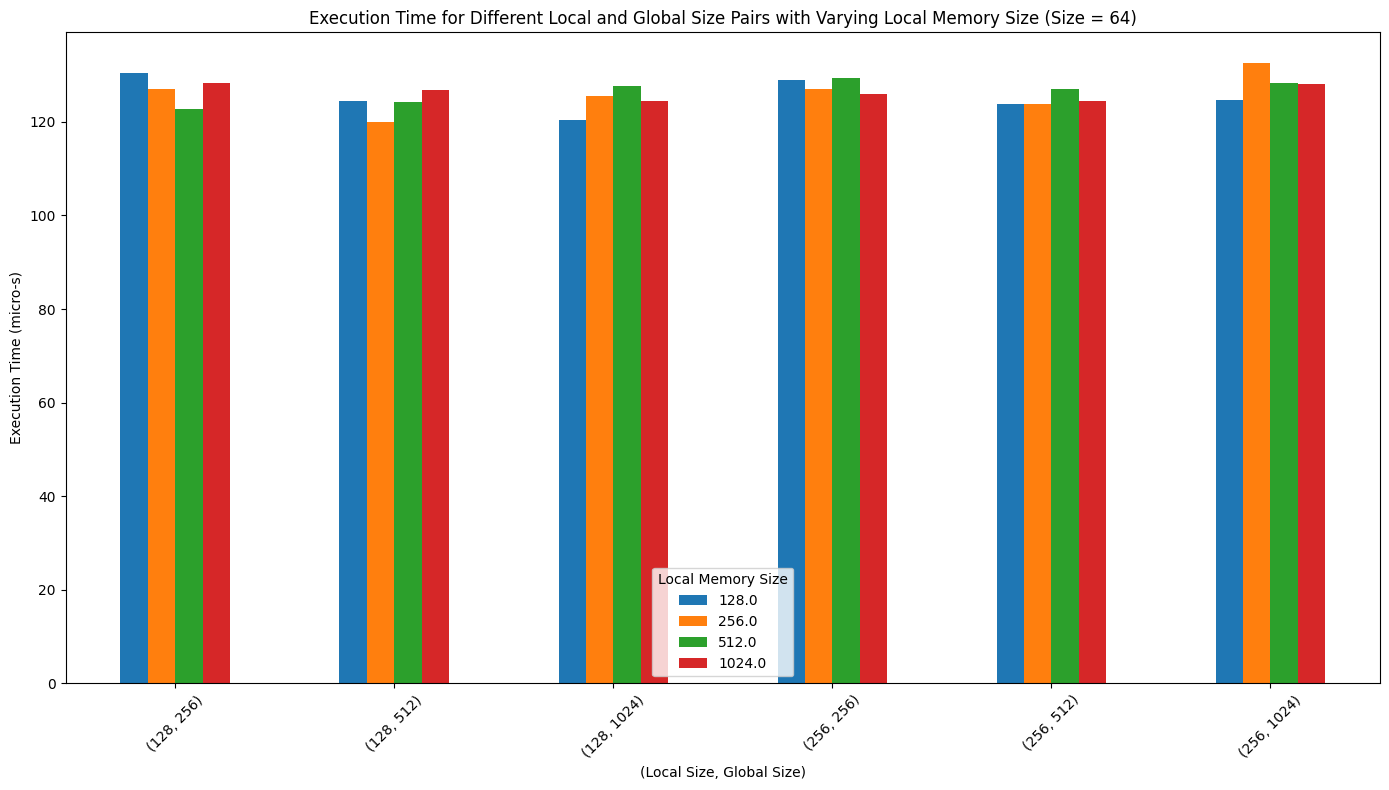

      size  local size  global size  local size y  global size y  \
90      32         128          256            16             16   
91      32         128          512            16             16   
92      32         128         1024            16             16   
98      32         128          256            16             16   
99      32         128          512            16             16   
...    ...         ...          ...           ...            ...   
1291    32         256          512            16             16   
1292    32         256         1024            16             16   
1298    32         256          256            16             16   
1299    32         256          512            16             16   
1300    32         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
90               384                 6             494             165   
91               384               

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


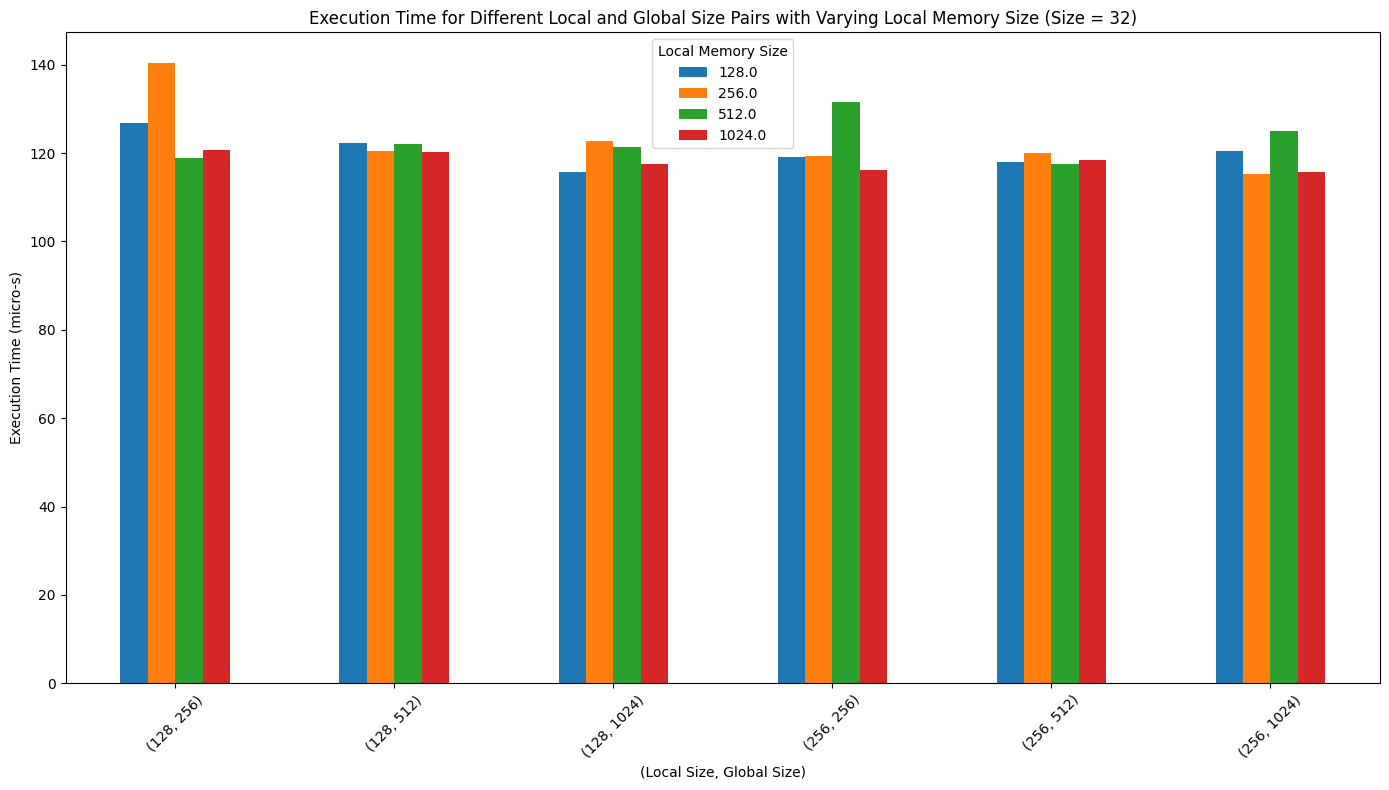

      size  local size  global size  local size y  global size y  \
2650   128         128          256            16             16   
2651   128         128          512            16             16   
2652   128         128         1024            16             16   
2658   128         128          256            16             16   
2659   128         128          512            16             16   
...    ...         ...          ...           ...            ...   
3851   128         256          512            16             16   
3852   128         256         1024            16             16   
3858   128         256          256            16             16   
3859   128         256          512            16             16   
3860   128         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
2650             384                21             222             244   
2651             384               

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


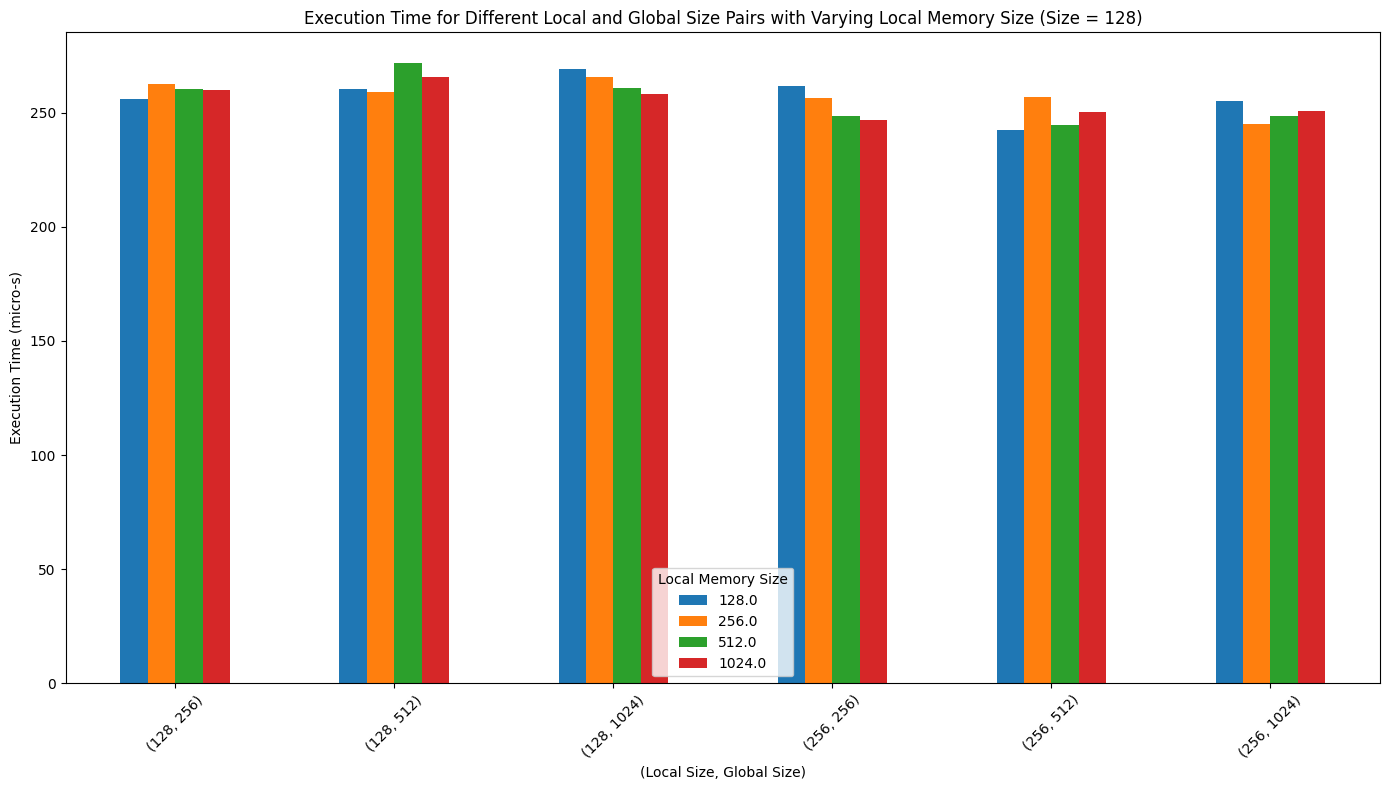

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


      size  local size  global size  local size y  global size y  \
3930   256         128          256            16             16   
3931   256         128          512            16             16   
3932   256         128         1024            16             16   
3938   256         128          256            16             16   
3939   256         128          512            16             16   
...    ...         ...          ...           ...            ...   
5131   256         256          512            16             16   
5132   256         256         1024            16             16   
5138   256         256          256            16             16   
5139   256         256          512            16             16   
5140   256         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
3930             384                42             226             303   
3931             384               

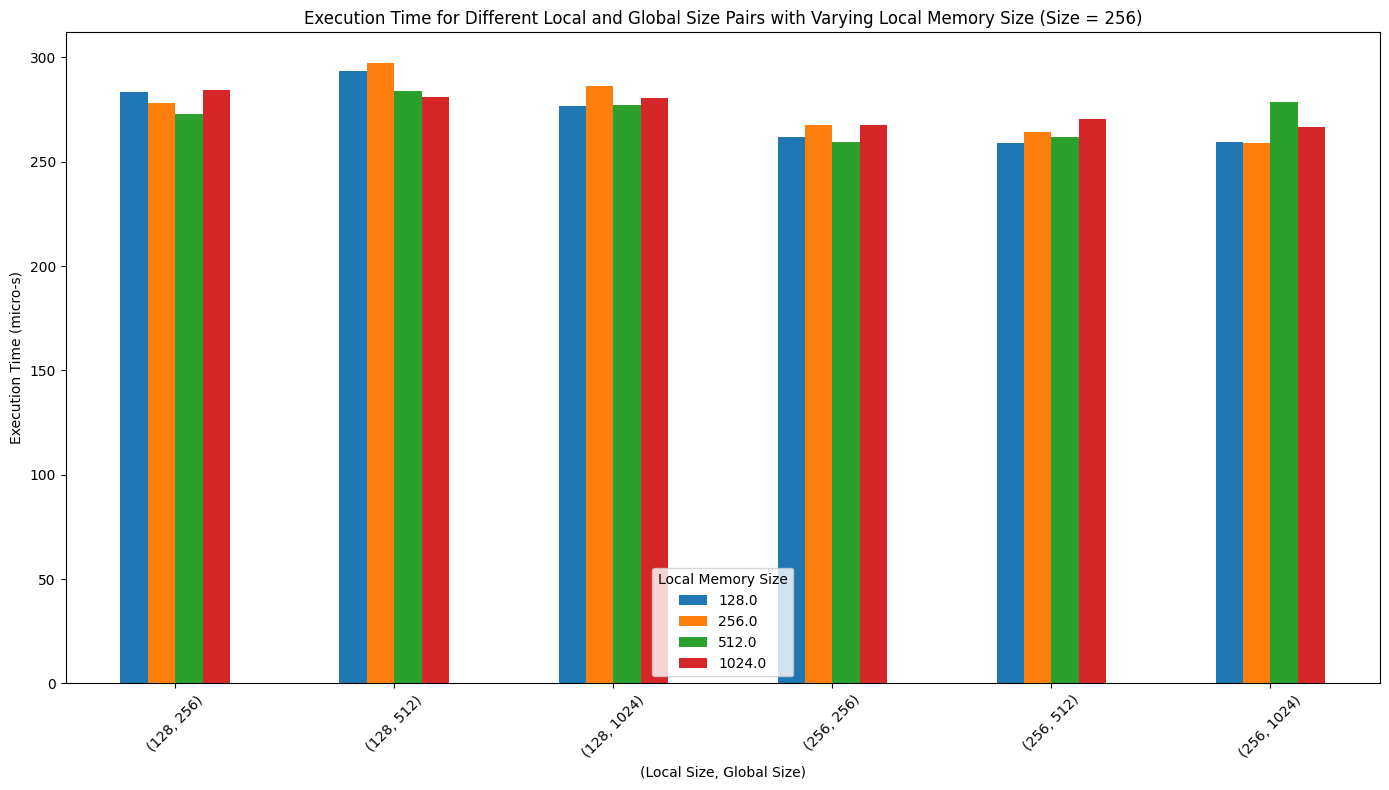

      size  local size  global size  local size y  global size y  \
5210   512         128          256            16             16   
5211   512         128          512            16             16   
5212   512         128         1024            16             16   
5218   512         128          256            16             16   
5219   512         128          512            16             16   
...    ...         ...          ...           ...            ...   
6411   512         256          512            16             16   
6412   512         256         1024            16             16   
6418   512         256          256            16             16   
6419   512         256          512            16             16   
6420   512         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
5210             384               101             213             311   
5211             384               

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


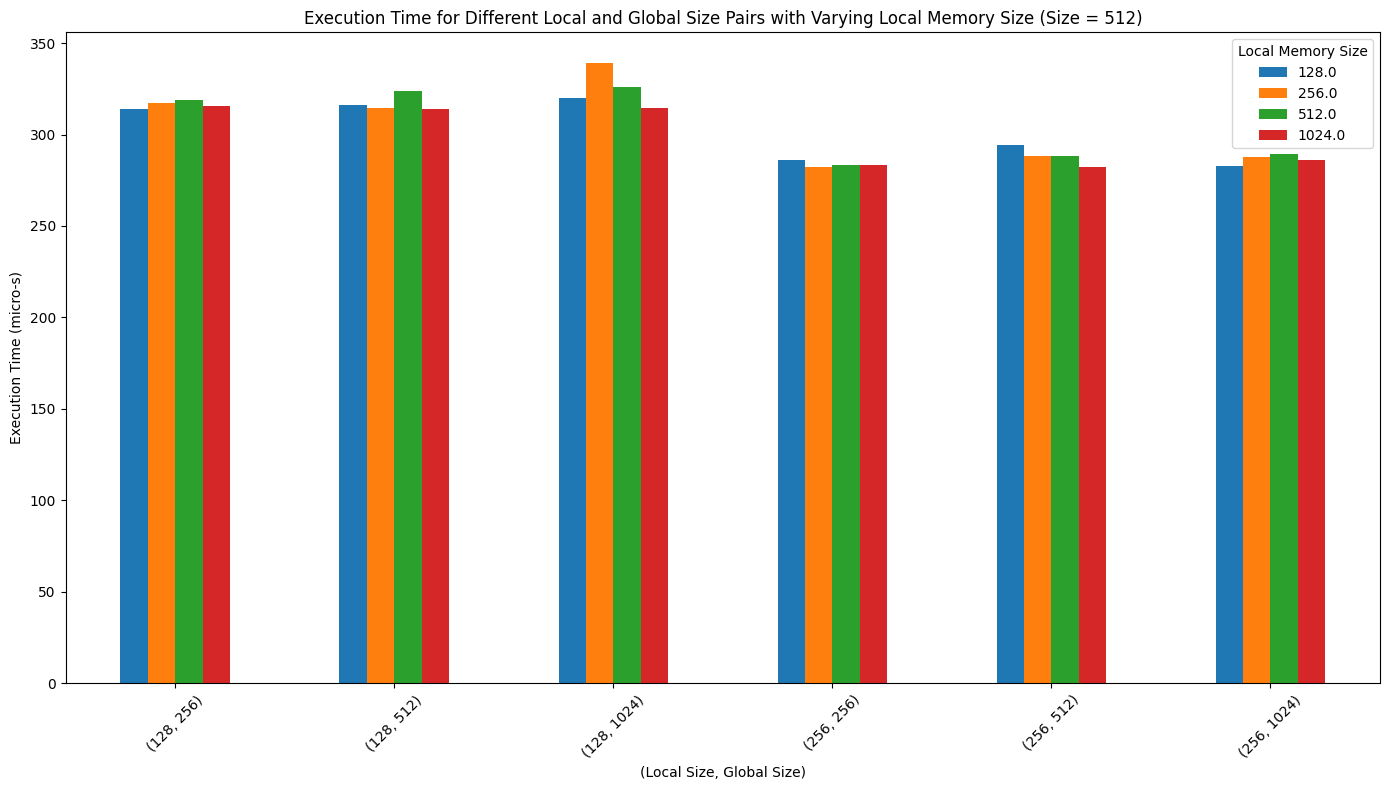

      size  local size  global size  local size y  global size y  \
6490  1024         128          256            16             16   
6491  1024         128          512            16             16   
6492  1024         128         1024            16             16   
6498  1024         128          256            16             16   
6499  1024         128          512            16             16   
...    ...         ...          ...           ...            ...   
7691  1024         256          512            16             16   
7692  1024         256         1024            16             16   
7698  1024         256          256            16             16   
7699  1024         256          512            16             16   
7700  1024         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
6490             384               165             251             393   
6491             384               

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


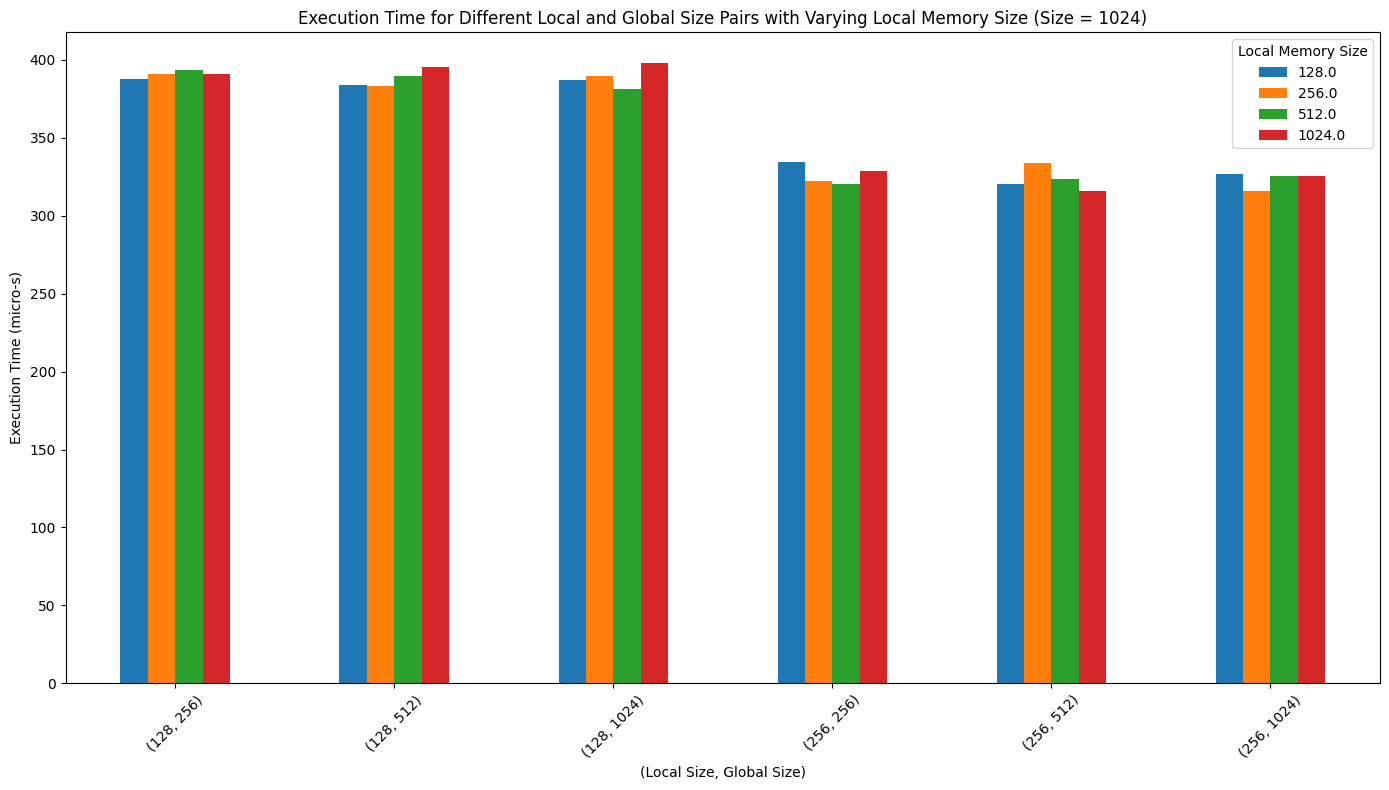

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


      size  local size  global size  local size y  global size y  \
7770  2048         128          256            16             16   
7771  2048         128          512            16             16   
7772  2048         128         1024            16             16   
7778  2048         128          256            16             16   
7779  2048         128          512            16             16   
...    ...         ...          ...           ...            ...   
8971  2048         256          512            16             16   
8972  2048         256         1024            16             16   
8978  2048         256          256            16             16   
8979  2048         256          512            16             16   
8980  2048         256         1024            16             16   

      local mem size  create data time  copy to device  execution time  \
7770             384               333             228             540   
7771             384               

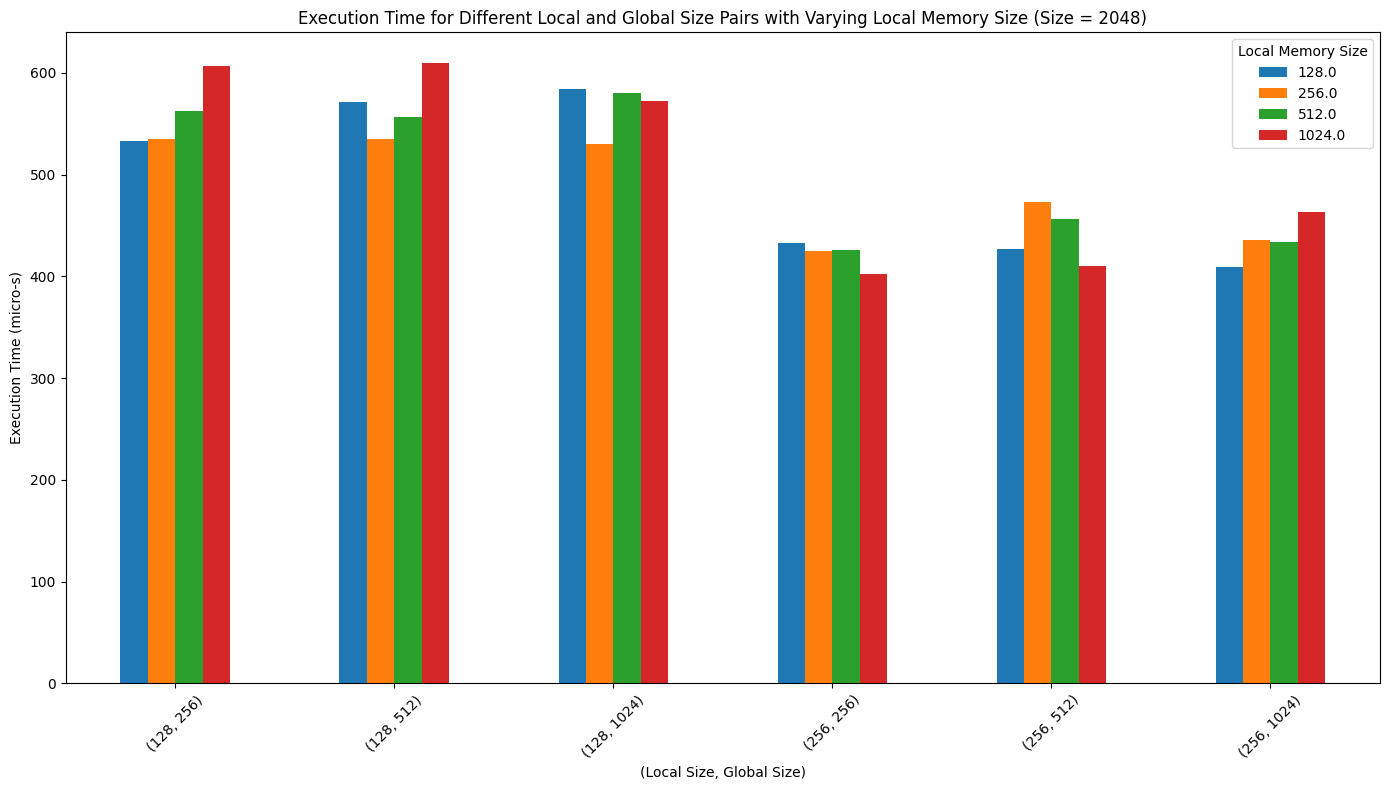

       size  local size  global size  local size y  global size y  \
9050   4096         128          256            16             16   
9051   4096         128          512            16             16   
9052   4096         128         1024            16             16   
9058   4096         128          256            16             16   
9059   4096         128          512            16             16   
...     ...         ...          ...           ...            ...   
10251  4096         256          512            16             16   
10252  4096         256         1024            16             16   
10258  4096         256          256            16             16   
10259  4096         256          512            16             16   
10260  4096         256         1024            16             16   

       local mem size  create data time  copy to device  execution time  \
9050              384               682             459             837   
9051              384

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


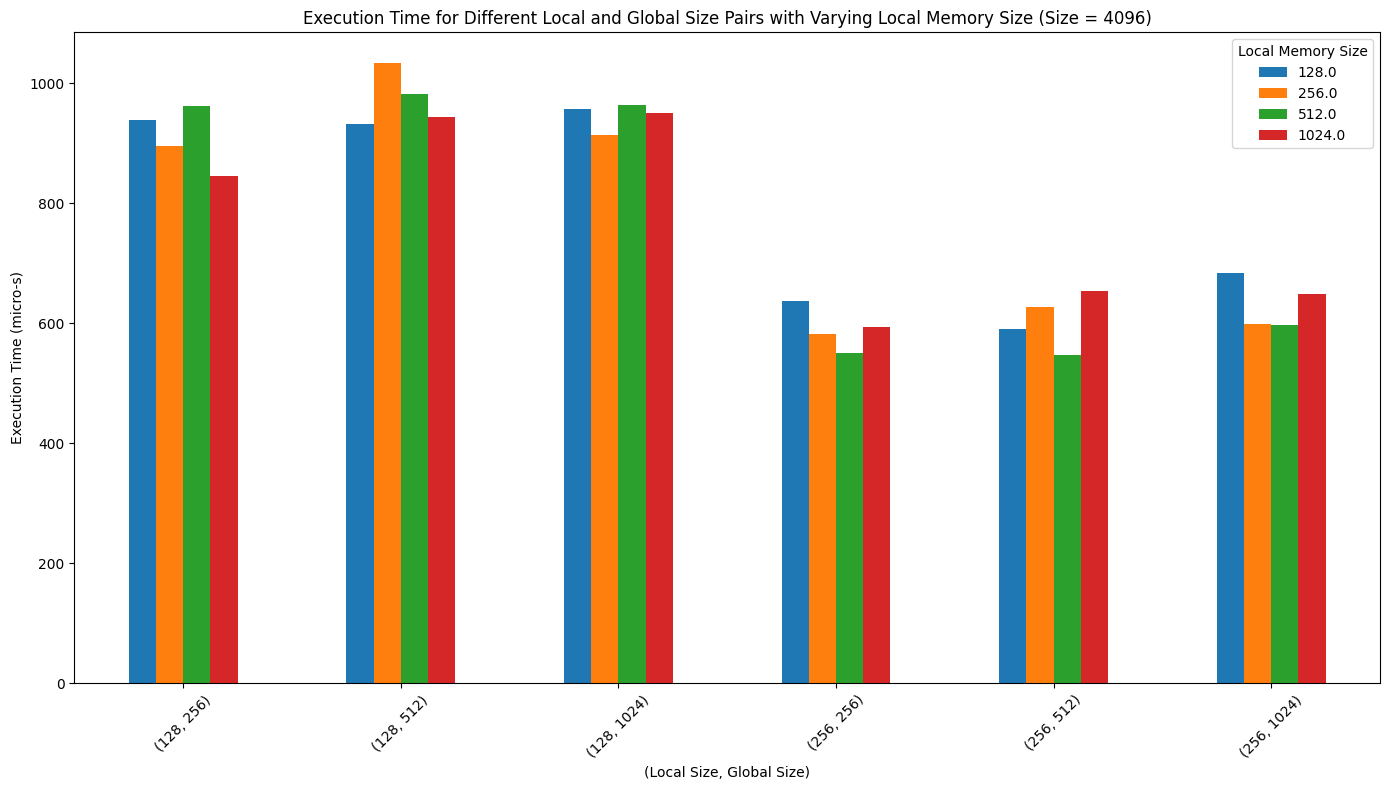

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\1805569238.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_data['local mem size 2'] = size_data['local mem size']/3


       size  local size  global size  local size y  global size y  \
10330  8192         128          256            16             16   
10331  8192         128          512            16             16   
10332  8192         128         1024            16             16   
10338  8192         128          256            16             16   
10339  8192         128          512            16             16   
...     ...         ...          ...           ...            ...   
11531  8192         256          512            16             16   
11532  8192         256         1024            16             16   
11538  8192         256          256            16             16   
11539  8192         256          512            16             16   
11540  8192         256         1024            16             16   

       local mem size  create data time  copy to device  execution time  \
10330             384              1363             415            1406   
10331             384

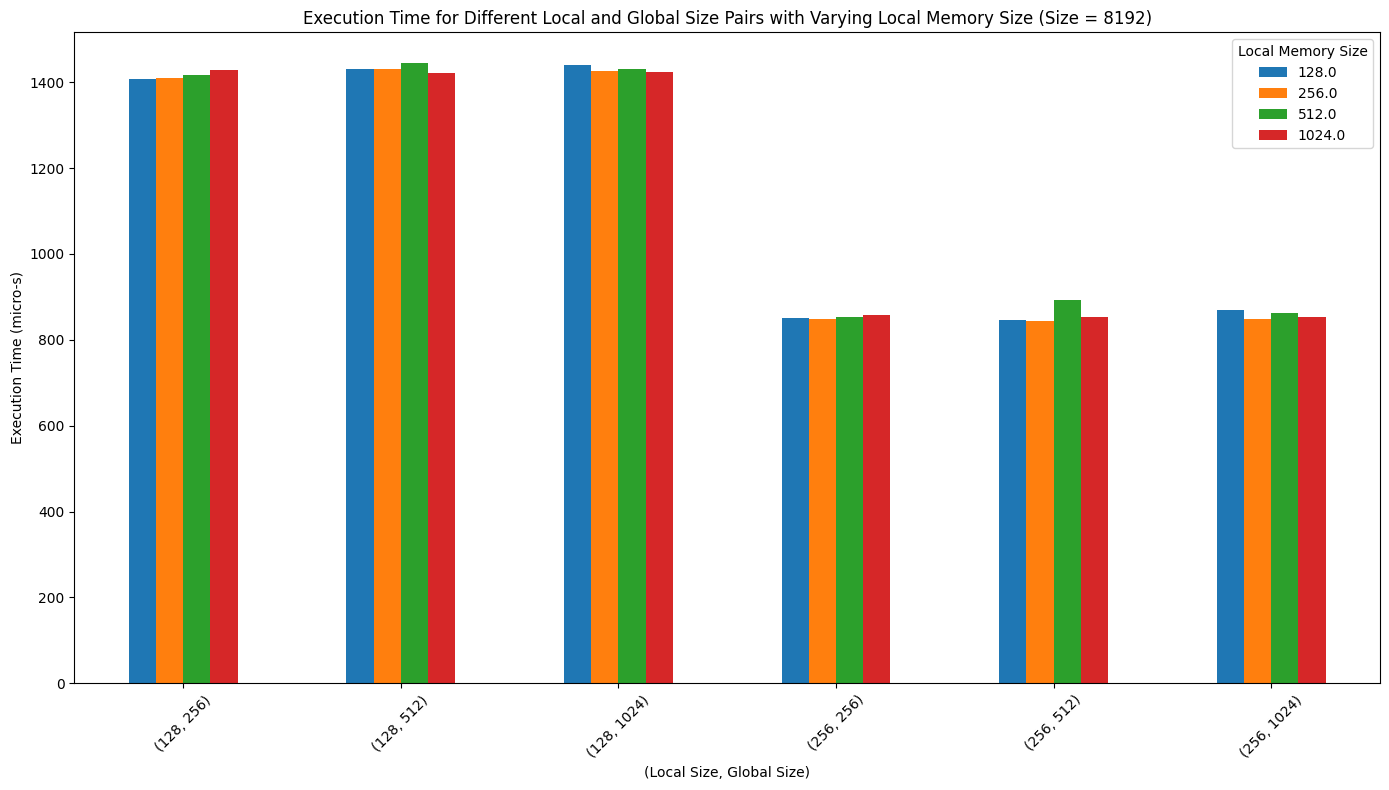

In [96]:
filtered_data = local_mem_cl_filtered[
    (local_mem_cl_filtered['local size'].isin([128, 256])) &
    (local_mem_cl_filtered['global size'].isin([256, 512, 1024]))
]

for size in unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = filtered_data[filtered_data['size'] == size]
    print(size_data)
    size_data['local mem size 2'] = int(size_data['local mem size']/3)
    # Crear una tabla pivot para facilitar el plotting
    pivot_table = size_data.pivot_table(values='execution time', index=['local size', 'global size'], columns='local mem size 2', aggfunc='mean')
    
    # Crear el gráfico de barras
    pivot_table.plot(kind='bar', figsize=(14, 8))
    
    # Configuraciones adicionales del gráfico
    plt.title(f'Execution Time for Different Local and Global Size Pairs with Varying Local Memory Size (Size = {size})')
    plt.xlabel('(Local Size, Global Size)')
    plt.ylabel('Execution Time (micro-s)')
    plt.legend(title='Local Memory Size')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

La variación observada no es según el tamaño determinado para la memoria compartida. Se concluye que para la máquina que ejecutó los test no hay diferencia evidente para los valores utilizados.

# Análisis solo con grupos Bidimensionales

Esta versión de la implementación es la tercera realizada, la que realiza los n**2 cálculos accediendo a memoria global habiendo mapeado los threads en una grilla bidimensional. Esta grilla fue definida con diferentes valores de filas y columnas, esperando encontrar la mejor estructura de mapeo.

In [67]:
bidimensional_cl_filtered["global_size_final"] = bidimensional_cl_filtered["global size"]*bidimensional_cl_filtered["global size y"]
bidimensional_cl_filtered["local_size_final"] = bidimensional_cl_filtered["local size"]*bidimensional_cl_filtered["local size y"]

C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\2028997798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bidimensional_cl_filtered["global_size_final"] = bidimensional_cl_filtered["global size"]*bidimensional_cl_filtered["global size y"]
C:\Users\ThermalTake\AppData\Local\Temp\ipykernel_15248\2028997798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bidimensional_cl_filtered["local_size_final"] = bidimensional_cl_filtered["local size"]*bidimensional_cl_filtered["local size y"]


#### Pares (global size x, global size y) vs el size

Se mostrará en mapas de calor el tiempo de ejecución promedio de grillas dentro de un grupo (local size x, local size y) para valores específicos de size (cantidad de cuerpos).

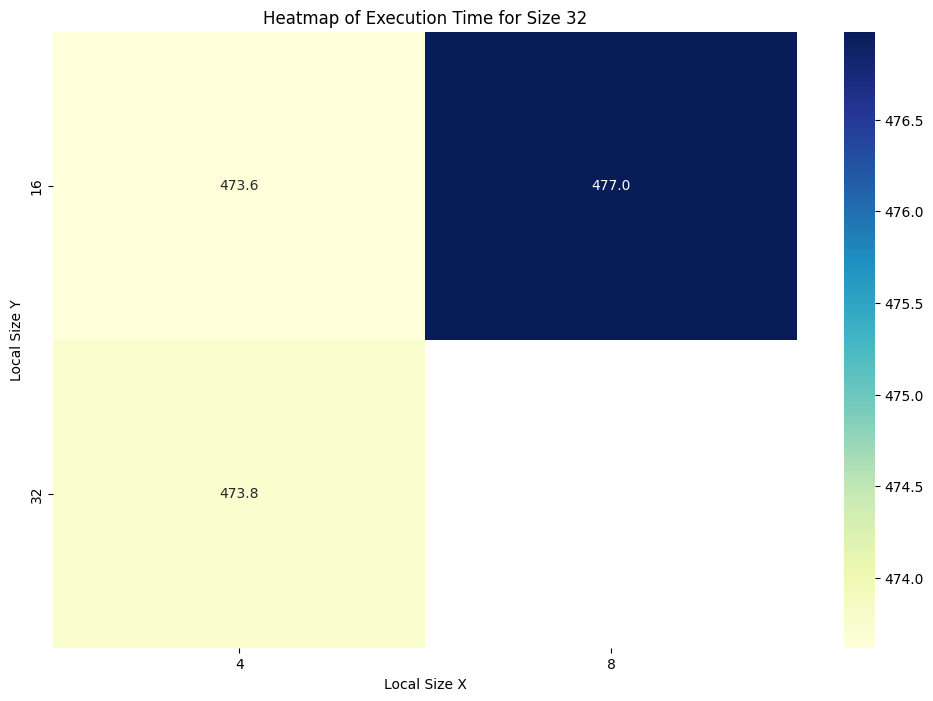

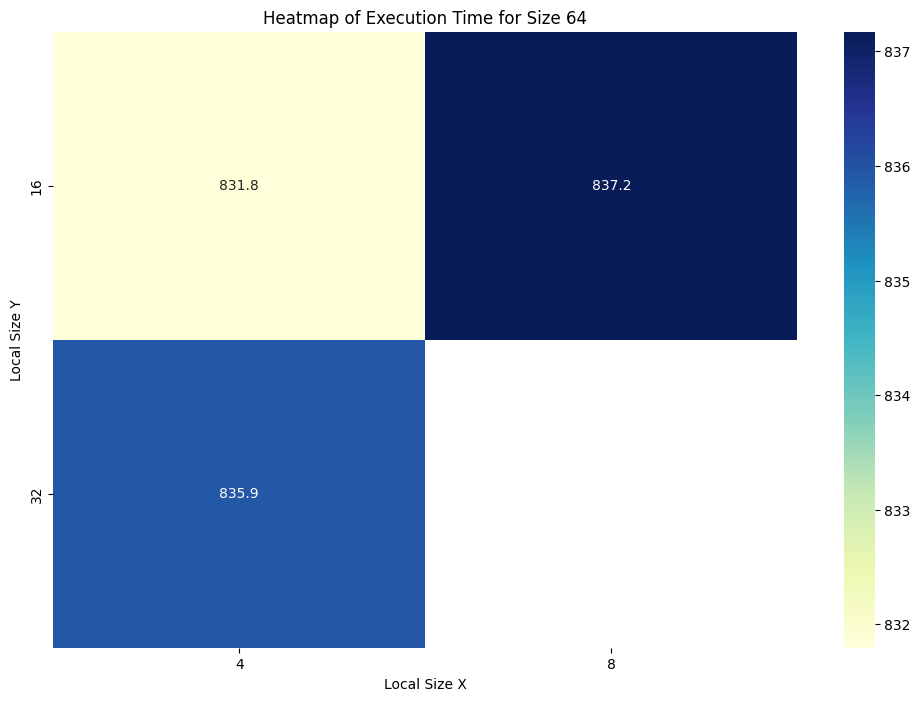

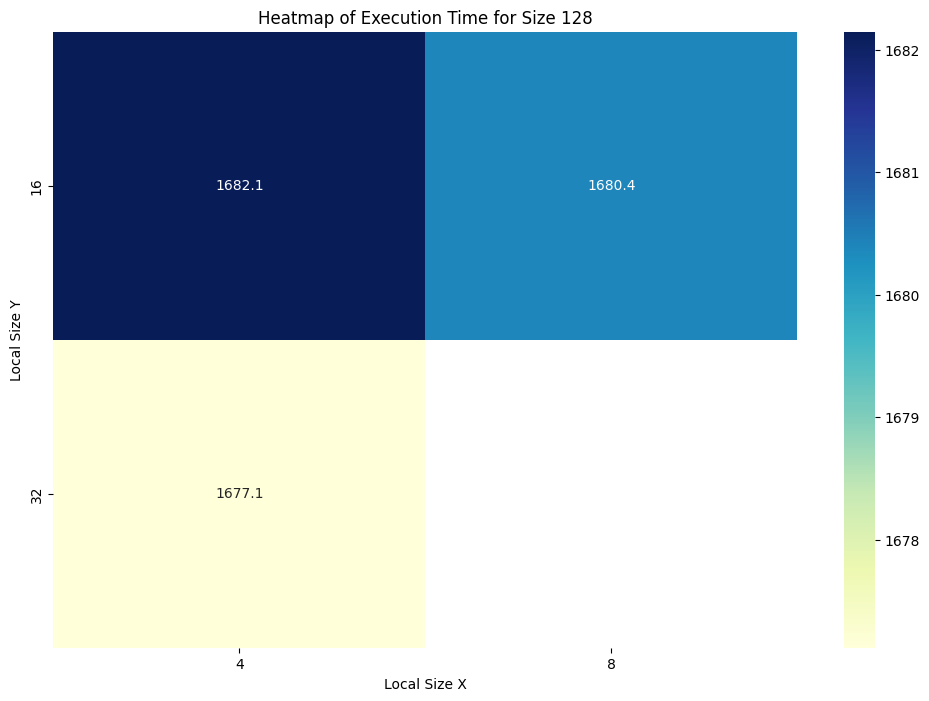

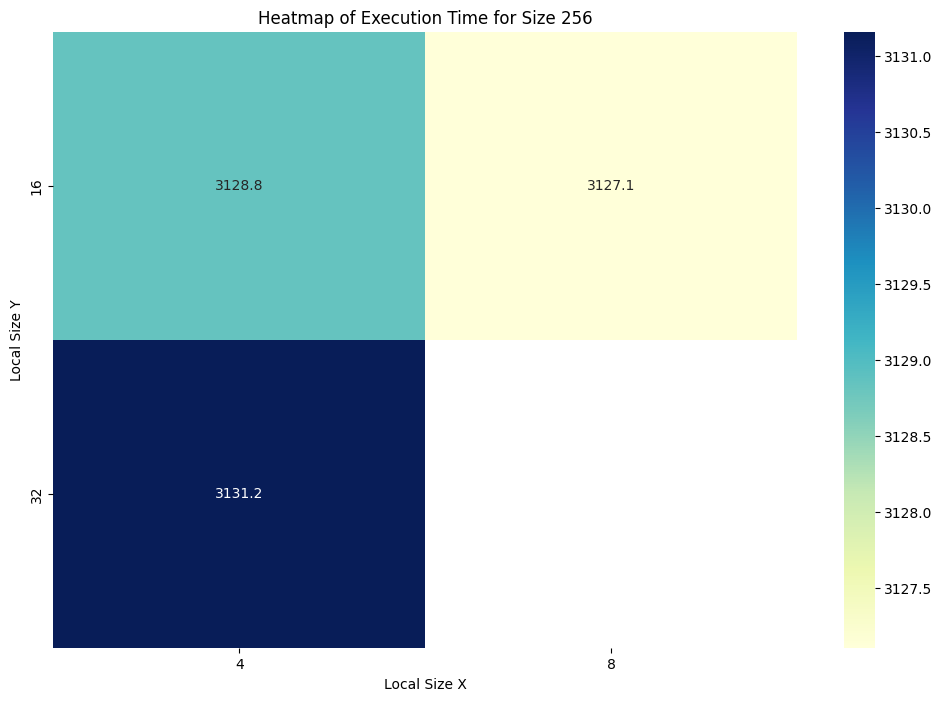

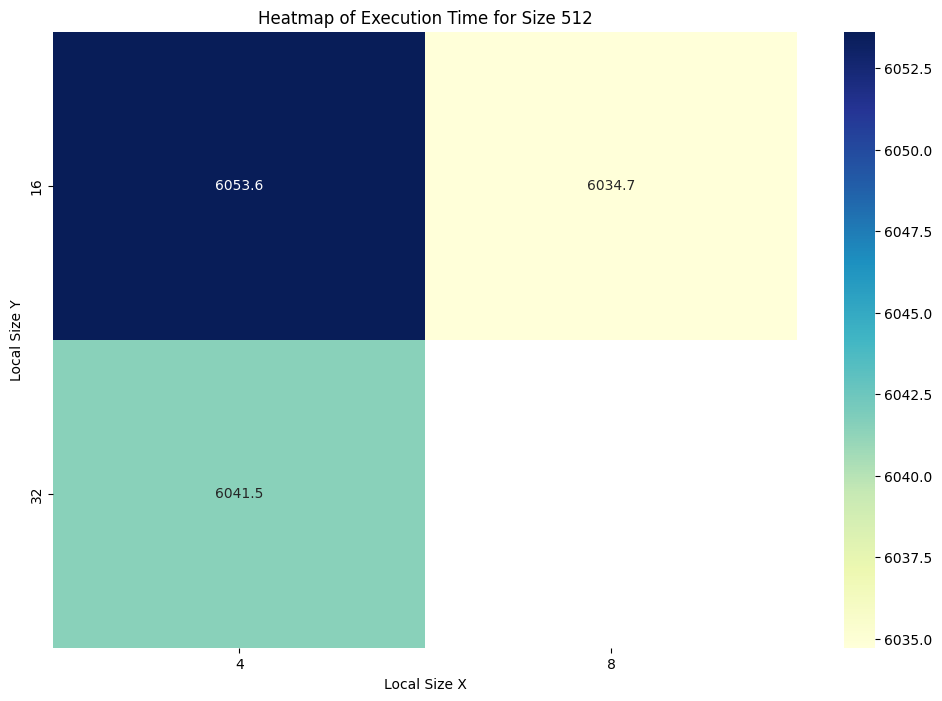

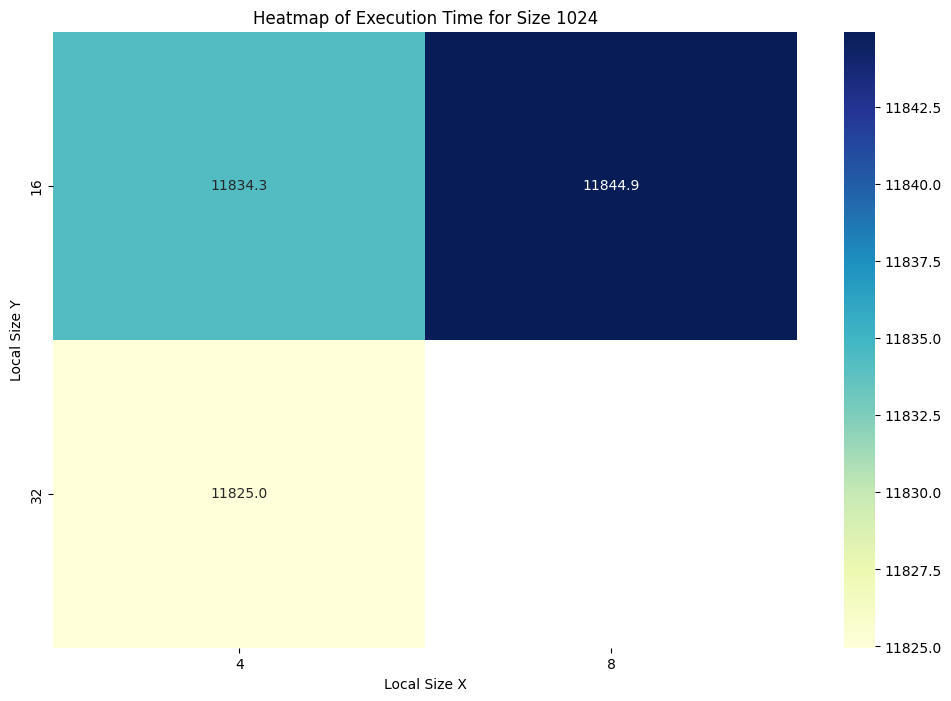

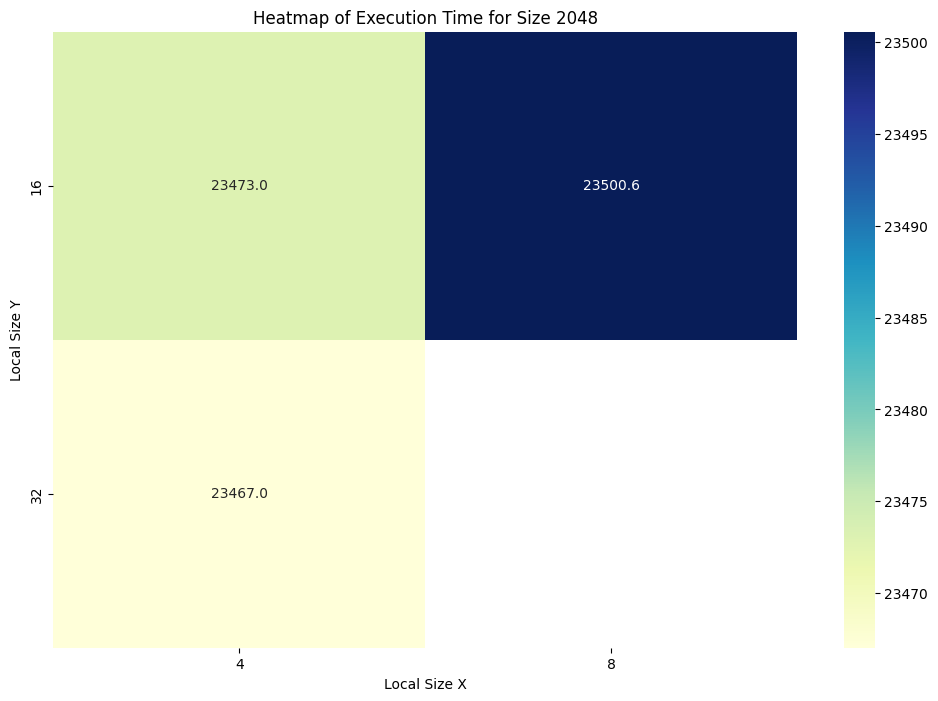

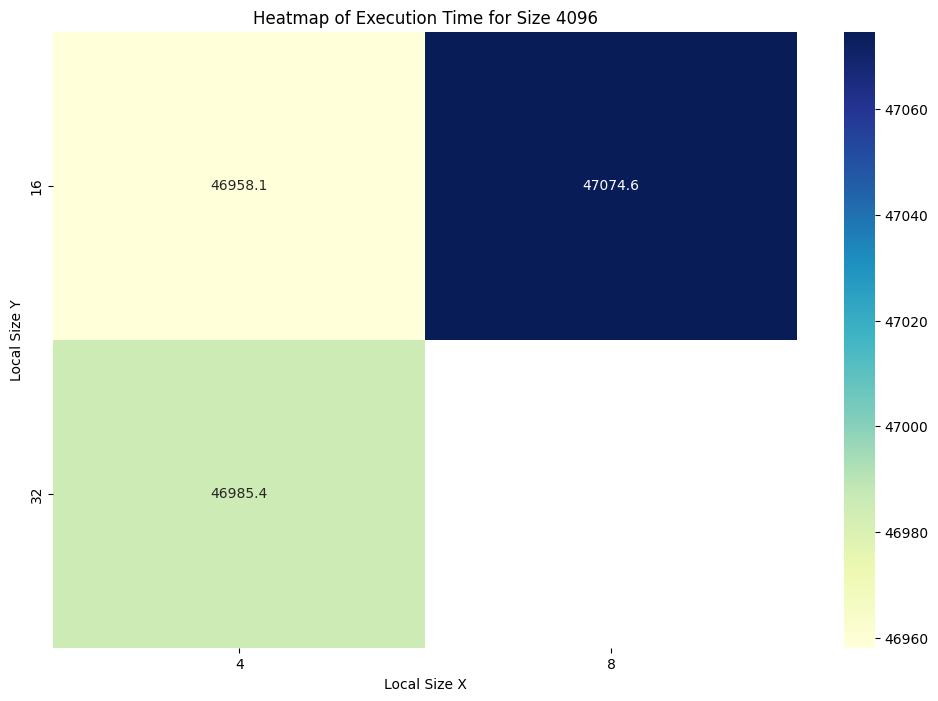

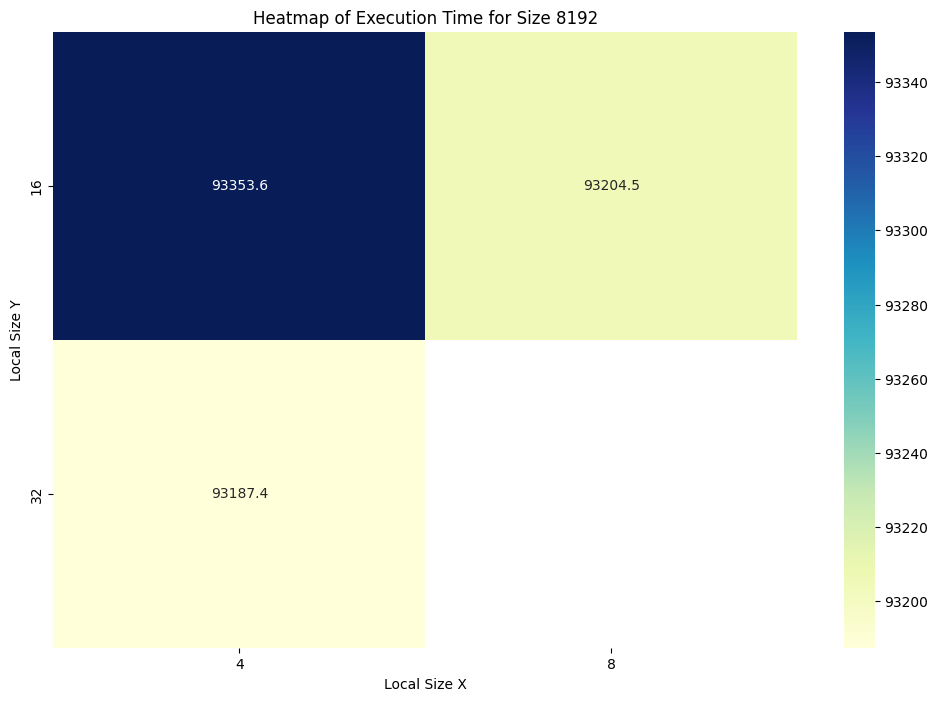

In [70]:
# Obtener los valores únicos de 'size'
unique_sizes = bidimensional_cl_filtered['size'].unique()

# Crear heatmaps para cada valor de 'size'
for size in unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = bidimensional_cl_filtered[bidimensional_cl_filtered['size'] == size]
    
    # Crear una tabla pivot para facilitar el plotting
    pivot_table = size_data.pivot_table(values='execution time', index='local size y', columns='local size', aggfunc='mean')
    
    # Crear el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title(f'Heatmap of Execution Time (micro-s) for Size {size}')
    plt.xlabel('Local Size X')
    plt.ylabel('Local Size Y')
    plt.show()

No se puede detectar un funcionamiento destacable para ninguna de las configuraciones, sin embargo, vemos que se producen problemas al mapear en grillas de 8xLSY (con LSY = local size y) y no se obtnienen resultados útiles.

#### Pares (global size x, global size y) vs el size

Se mostrará en mapas de calor el tiempo de ejecución promedio de grillas del espacio de cómputo (global size x, global size y) para valores específicos de size (cantidad de cuerpos).

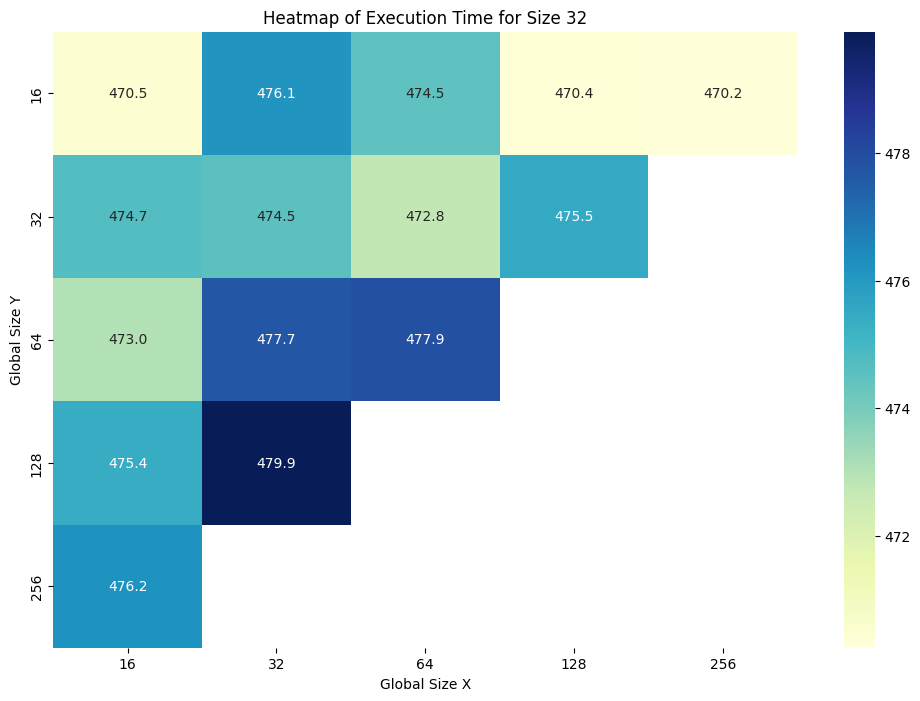

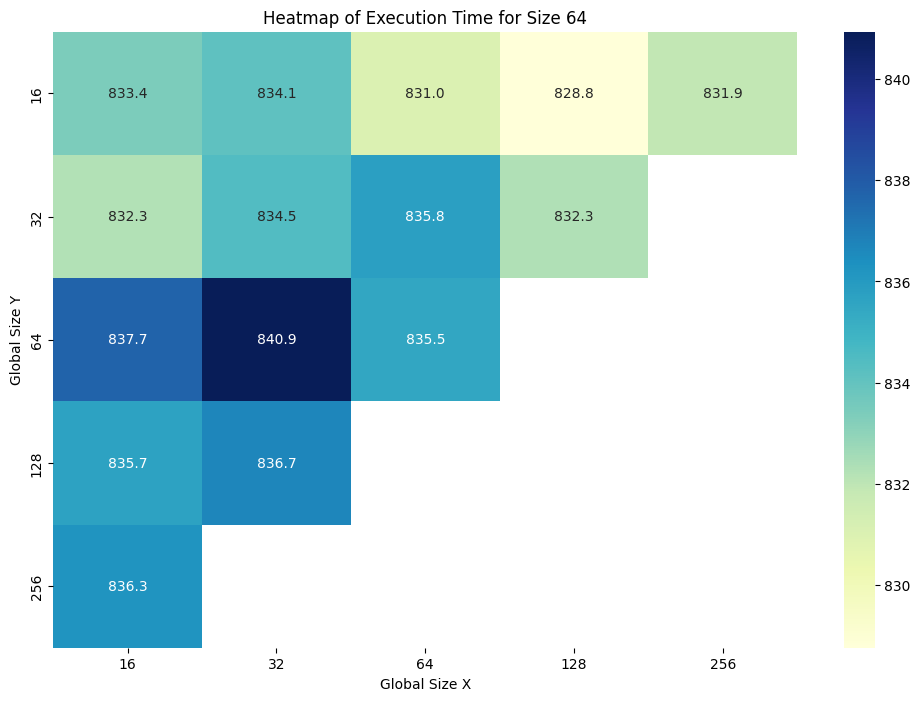

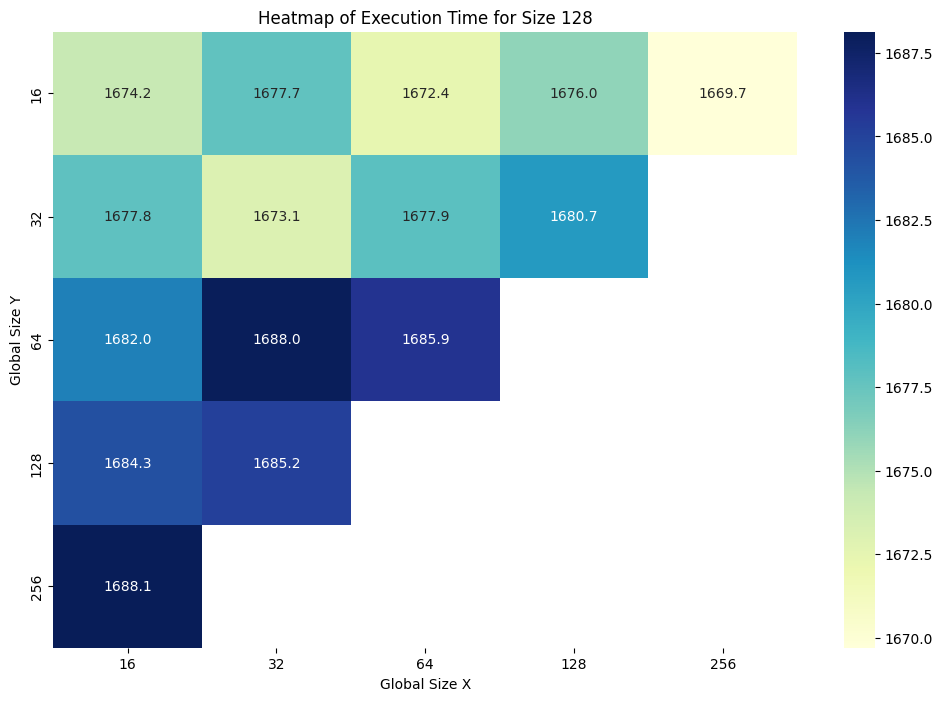

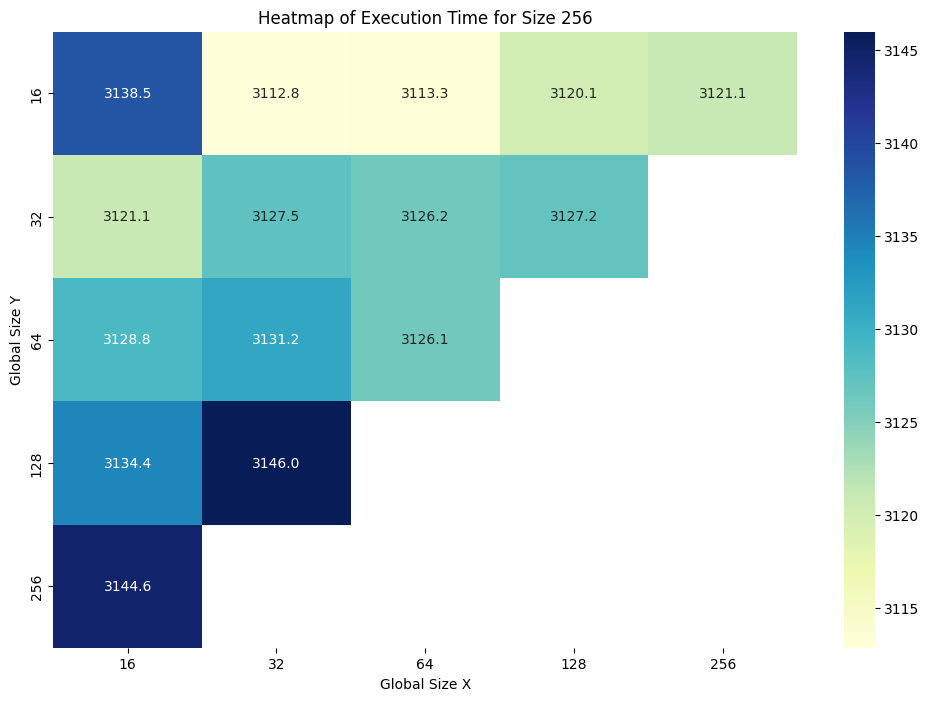

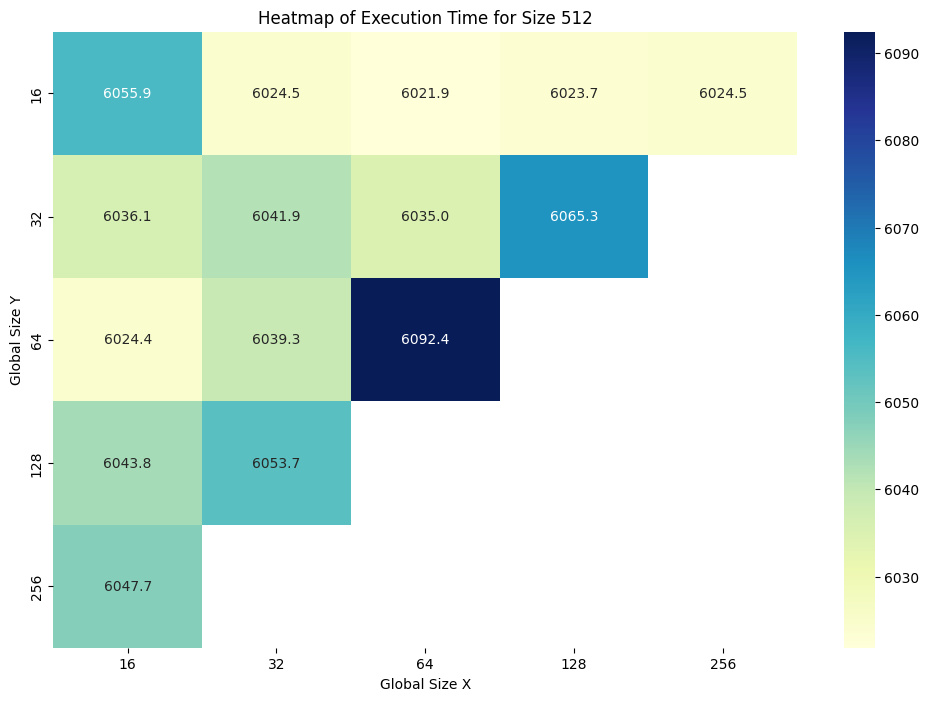

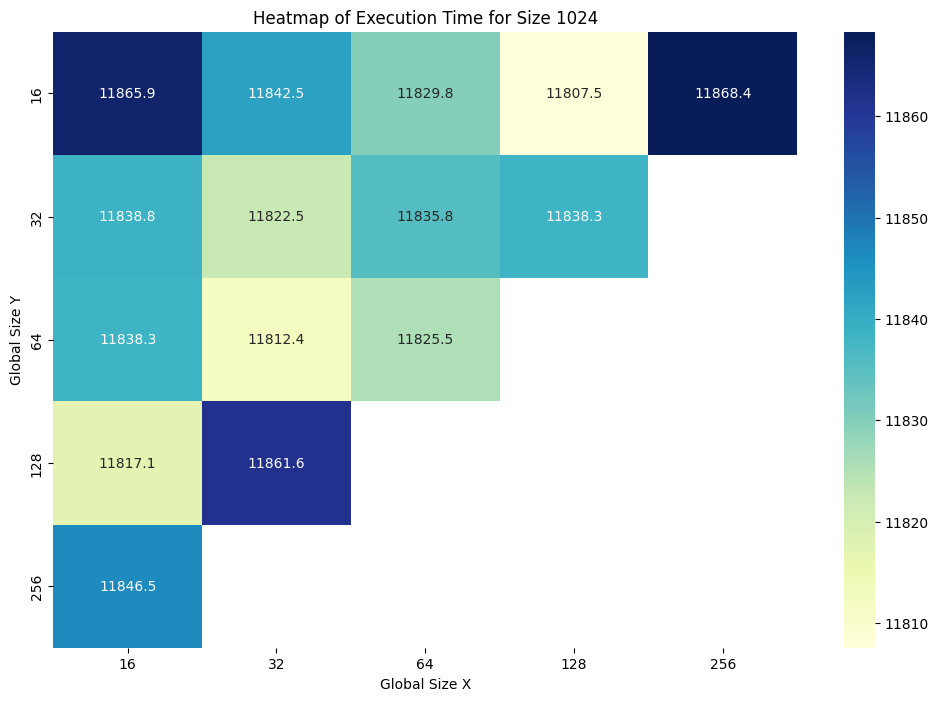

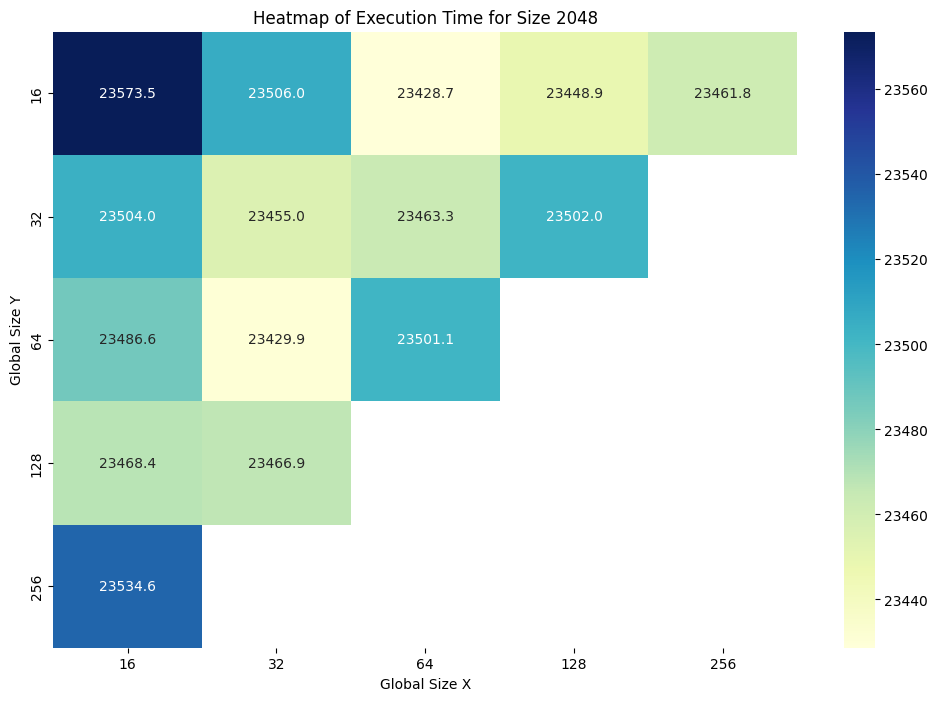

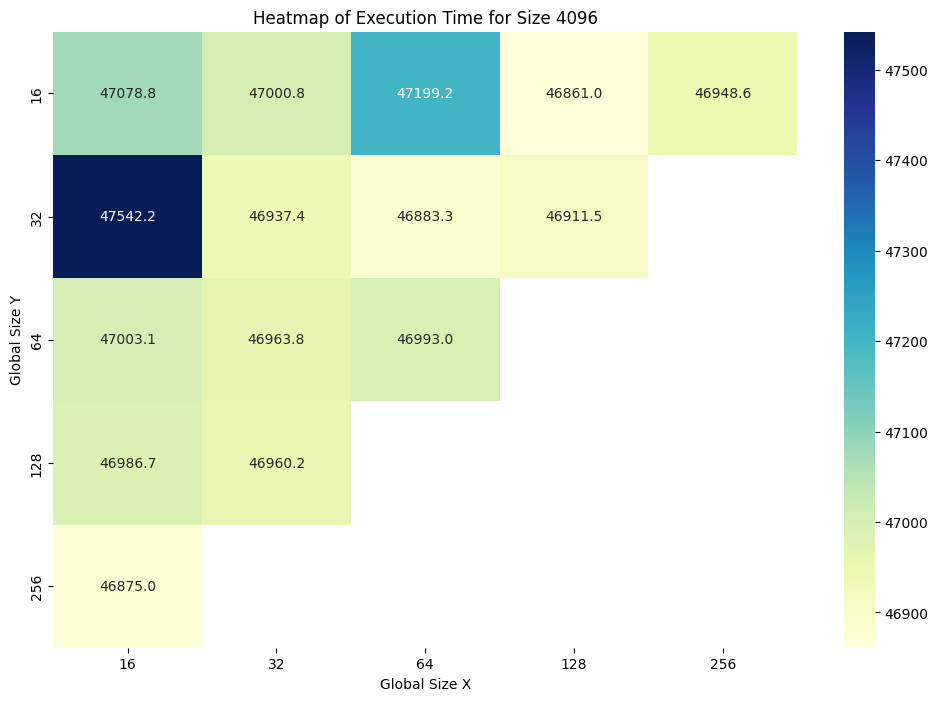

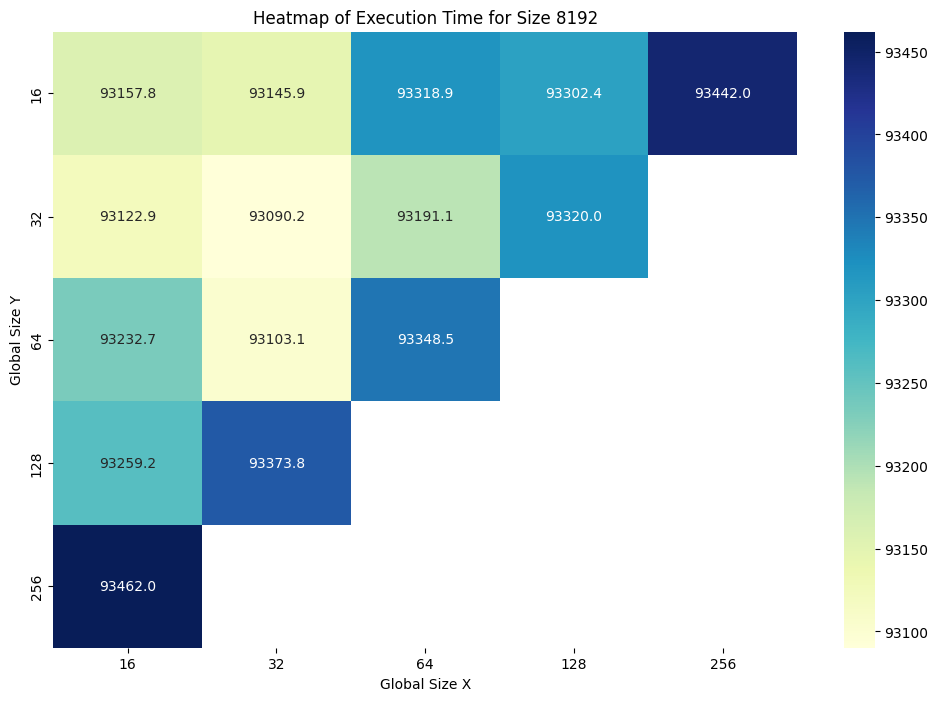

In [71]:
# Obtener los valores únicos de 'size'
unique_sizes = bidimensional_cl_filtered['size'].unique()

# Crear heatmaps para cada valor de 'size'
for size in unique_sizes:
    # Filtrar los datos por el tamaño actual
    size_data = bidimensional_cl_filtered[bidimensional_cl_filtered['size'] == size]
    
    # Crear una tabla pivot para facilitar el plotting
    pivot_table = size_data.pivot_table(values='execution time', index='global size y', columns='global size', aggfunc='mean')
    
    # Crear el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title(f'Heatmap of Execution Time (micro-s) for Size {size}')
    plt.xlabel('Global Size X')
    plt.ylabel('Global Size Y')
    plt.show()

En este caso se observa cierta mejoría para valores de grilla cuya cantidad de columnas sea 16, y que en particular para 128 filas se tienen los mejores resultados en varios casos.